<a href="https://colab.research.google.com/github/MMustafa01/Sentiment-140-Naive-Bayses/blob/main/Final_AI_project_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm 
import pickle
from sklearn.neural_network import MLPClassifier

#Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Preprocesing Data


In [ ]:
fileName = "drive/MyDrive/AI_Project/training_data.csv"
dataset = pd.read_table(fileName, header=0, sep=",", encoding="ISO-8859-1", engine="c")

features = ["target", "ids", "date", "flag", "user", "text"]
dataset = dataset.sample(frac = 1)

data_long,target_long = dataset[features[5]].fillna(" "), dataset[features[0]]
init_Data = (data_long[0:100000]) #Get the initial vocabulary

In [ ]:
dataset['target'].unique()
dataset.drop(["date", "flag", "user"], axis=1, inplace=True)
dataset.drop('ids', axis=1, inplace=True)
dataset.head(10)

,target,text
590847,0,wish I could kick this cold so that I can buy ...
943504,4,@Dangelus join the club...I'm tired too. Bu...
245560,0,"The Killers, Katy Perry, The Script, Coldplay ..."
1379542,4,time to sleep. gotta wake up early tomorrow -_...
1567584,4,had a very well sleep last night!
800503,4,"Played @ gpokr.com, busted some n00b arses wa..."
541782,0,@jessyrocks7 OMG me 2 its on the cmt channel i...
1029025,4,Remember the lessons you've learned....things ...
1231709,4,Hey tweets ! Good Morning thankful to see anot...
1234960,4,This month's giveaway will be the boxed set of...


In [ ]:
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'her', 'she', 'further', "you'll", 'did', 'y', 'an', 've', 'was', 'i', 'there', "needn't", "you've", 'again', "aren't", 'having', "it's", "doesn't", 'shouldn', 't', 'should', 'isn', 'be', 'in', 'the', 'if', 'at', 'their', 'herself', 'once', 'until', 'same', 'during', 'aren', 'mustn', 'don', 'were', 'it', 'been', 'under', 'by', 'from', 'while', "don't", 'didn', 'our', 'theirs', 'between', 'd', 'hadn', 'over', 'your', "wasn't", 'then', 'myself', "she's", 'of', 'had', 'than', 'ours', 'we', 'yourselves', 'have', 'or', "shouldn't", 'they', 'out', 'about', 'its', "hasn't", 'now', 'doing', 'for', 'won', 'which', 'am', 'but', 'against', 'yourself', 'most', 'couldn', 'does', 'being', 'few', 'is', "mustn't", 'other', 'needn', 'them', "didn't", 'any', 'with', 'who', 'these', 're', 'up', 'themselves', "mightn't", 'how', 'no', 'this', "won't", 'he', 'hasn', "shan't", 'haven', 'on', 'wouldn', 'shan', 'wasn', 'm', 'why', 'mightn', "that'll", 'after', 'some', "you're", 'll', 'has', 'you', 'very', 'th

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
def process_tweets(sentiment):

    #tokenizing words
    tokens = word_tokenize(sentiment)
    #tokens = [w for w in tokens if len(w)>2]
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
dataset['processed_text'] = tqdm(dataset['text'].apply(lambda x: process_tweets(x)))
# Saving the dataset so that it can be used again later

100%|██████████| 1600000/1600000 [00:00<00:00, 2595500.21it/s]


In [ ]:
dataset.head(10)

,target,text,processed_text
590847,0,wish I could kick this cold so that I can buy ...,wish could kick cold buy new cycling gear fina...
943504,4,@Dangelus join the club...I'm tired too. Bu...,Dangelus join club ... 'm tired But bet reason...
245560,0,"The Killers, Katy Perry, The Script, Coldplay ...",The Killers Katy Perry The Script Coldplay aaa...
1379542,4,time to sleep. gotta wake up early tomorrow -_...,time sleep got ta wake early tomorrow -___- pr...
1567584,4,had a very well sleep last night!,well sleep last night
800503,4,"Played @ gpokr.com, busted some n00b arses wa...",Played gpokr.com busted n00b arses waiting pok...
541782,0,@jessyrocks7 OMG me 2 its on the cmt channel i...,jessyrocks7 OMG cmt channel basic cable cant see
1029025,4,Remember the lessons you've learned....things ...,Remember lesson 've learned .... thing hurt teach
1231709,4,Hey tweets ! Good Morning thankful to see anot...,Hey tweet Good Morning thankful see another day
1234960,4,This month's giveaway will be the boxed set of...,This month 's giveaway boxed set TRUE BLOOD Se...


In [ ]:
##Now that we have processed the dataset, we have uploaded the processed version on google drive, and will simply run this cell instead of processing the entire dataset again
features = ["target", "ids", "date", "flag", "user", "text"]
fileName = "/content/drive/MyDrive/AI_Project/processed_dataset.csv"
dataset = pd.read_table(fileName, header=0, sep=",", encoding="ISO-8859-1", engine="c")

In [ ]:
data_long,target_long = dataset["processed_text"].fillna(" "), dataset[features[0]]
init_Data = (data_long[0:100000]) #Get the initial vocabulary


## Main body code 

In [ ]:
print(init_Data)
dataset.head(10)

0        pretty sure blink sweet little girl wearing ca...
1            wondering anyone weld cast iron back together
2                  wave Sukieeee connie93 Good Morning ppl
3        lilylauren http //twitpic.com/68v8s Enjoy flig...
4                        yay easy street owned jump roping
                               ...                        
99995                               Who fly high fall deep
99996                                    rabbigreen OK win
99997           n't want anything want SHE everything need
99998    calpizzakitchen date night great 10 quot Bring...
99999    mandyblake night saw post started laughing You...
Name: processed_text, Length: 100000, dtype: object


,target,text,processed_text
0,0,I am pretty sure if I blink this sweet little ...,pretty sure blink sweet little girl wearing ca...
1,0,wondering if anyone can weld some cast iron ba...,wondering anyone weld cast iron back together
2,4,waves @ Sukieeee @connie93 Good Morning ppl!!,wave Sukieeee connie93 Good Morning ppl
3,4,@lilylauren http://twitpic.com/68v8s - Enjoy y...,lilylauren http //twitpic.com/68v8s Enjoy flig...
4,4,yay for easy street! owned at jump roping. ;],yay easy street owned jump roping
5,4,"@iphonediva Sherry's nice, but far too sweet ...",iphonediva Sherry 's nice far sweet 'm sweet e...
6,4,GOOD MORNING Got a two hour sleep so I'm nice...,GOOD MORNING Got two hour sleep 'm nice rested...
7,4,"@RealAnnieDuke Aaaaannnddd, Annie has to expla...",RealAnnieDuke Aaaaannnddd Annie explain Twitte...
8,4,"@BlasianSixFoota Ah, I lived n Vegas, interest...",BlasianSixFoota Ah lived Vegas interesting cit...
9,4,@kellykenniff i love you,kellykenniff love


In [ ]:
def load_file(fileName):
    dataset = pd.read_table(fileName, header=0, sep=",", encoding="ISO-8859-1", engine="c")
    
    return dataset

# preprocess creates the term frequency matrix for the review data set
def preprocess(data, vocabulary = None, vectorizer = 'count'):
    if vectorizer == 'count':
        count_vectorizer = CountVectorizer(vocabulary = vocabulary)
        data = count_vectorizer.fit_transform(data)
        return data, count_vectorizer.vocabulary_ #this returns the word vectors and the  vocabulary
    elif vectorizer == "TFidf":     
        TFidf_vectorizer = TfidfVectorizer(vocabulary = vocabulary)
        data = TFidf_vectorizer.fit_transform(data)
        return data, TFidf_vectorizer.vocabulary_ #this returns the word vectors and the  vocabulary
    else:
        # print('Please Check name of vectorizer')
        raise TypeError("Please Check name of vectorizer")   

    return data, count_vectorizer.vocabulary_ #this returns the word vectors and the  vocabulary

def learn_model(data,target, classifier = None):
    
    # classifier = None
    #Your custom implementation of NaiveBayes classifier will go here.
    
    data_array = data.toarray() # converting the data to an array  

    dimensions = data_array.shape # extracting matrix dimensions using the .shape() function
    data_no_of_rows, data_no_of_columns = dimensions[0], dimensions[1]

    target_new = np.unique(target) # formating target data 
    target_new = list(target_new) 
    target_new_length = len(target_new) 

    p_array_1, p_array_2 = np.zeros((target_new_length,data_no_of_columns)), [0]*target_new_length # empty arrays for probabilities

    for x in range(target_new_length): 
        temp = data_array[target == target_new[x]]

        temp_dimensions = temp.shape
        temp_no_of_rows, temp_no_of_columns = temp_dimensions[0], temp_dimensions[1]
        
        p_array_1[x] = np.sum(temp,axis=0)   
        p_array_1[x] += 1 
        p_array_1[x] = p_array_1[x] / (np.sum(p_array_1[x]))

        p_array_2[x] = temp_no_of_rows / data_no_of_rows

    p_class = pd.Series(p_array_2, target_new)
    if classifier == None:
        classifier = (p_array_1,p_class, target_new)
        
    else:
        print(f"The old classifier \n {classifier[0]}\n new computed calssifier \n {p_array_1}")
        classifier = (np.add(classifier[0],p_array_1)/2,np.add(p_class,classifier[1])/2, np.add(classifier[2],target_new)/2) #maybe implement intepolation with a normal standard guassian pdf
        # classifier = (p_array_1,p_class, target_new)
        # print(f'P_aray = \n{p_array_1}, P_class \n{p_class}, target \n {target_new} ')
    print(f"The new model = \n {classifier}")    
    return classifier

def classify(classifier, testdata):
    
    predicted_val=[]
    #Your code to classify test data using the learned model will go here
    
    test_array = testdata.toarray() 
    test_array_dimensions = test_array.shape
    ta_no_of_rows, ta_no_of_columns = test_array_dimensions[0], test_array_dimensions[1]

    p = classifier[0]
    p_class = classifier[1]
    classes = classifier[2]
    classes_length = len(classes)
    
    for x in range(ta_no_of_rows): 
        p_array = [0] * classes_length
        for y in range(classes_length):
            var = p[y][test_array[x].astype(bool)].prod()
            p_array[y] = p_class[classes[y]] * var 
        final_array = pd.Series(p_array,classes)
        predicted_val.append(final_array.idxmax())

    return predicted_val

## Training Loop

In [ ]:
'''
Note: 
Parameters here: 
count vectorization or tfidf vectorization: Rn we are using tidf
Window size: The size of the dataset segment that is used to train the mmodel per epoch
vocabulary: The vocabulary is the words that will be part of th tokenizatiion
'''

count_vectorizer = CountVectorizer()
print(np.shape(count_vectorizer.fit_transform(init_Data)))
vocabulary = count_vectorizer.vocabulary_
window_size = 10000

print(f"This is the shape of the vocabulary = {len(vocabulary)}, \n {(vocabulary)}")
model = None 
for i in tqdm(range(0,int(1600000/window_size))):
    data = data_long[window_size*i:window_size*(i+1)]
    target = target_long[window_size*i:window_size*(i+1)]
    print("preprocessing data to construct word_vectors.....")
    word_vectors, vocabulary = preprocess(data,vocabulary, 'TFidf')
    print(f"The size of the vector = {np.shape(word_vectors)}")
    print(f"The shape of the word_vector {np.shape(word_vectors)}")    
    trainingX,testX,trainingY,testY = train_test_split(word_vectors,target,test_size=0.4,random_state=43)
    print(f"trainingX shape {np.shape(trainingX)} \n testX shape {np.shape(testX)} \n trainingY shape {np.shape(trainingY)}\n testY shape {np.shape(testY)}")
    print("Learning model.....")
    model = learn_model(trainingX,trainingY, model)

    # print("Classifying test data......")      
    predictedY = classify(model, testX)
    
    print("Evaluating results.....")
    accuracy = sklearn.metrics.accuracy_score(testY, predictedY)
    print(f'The acuracy  = {accuracy}')

(100000, 94499)
This is the shape of the vocabulary = 94499, 
 {'pretty': 66747, 'sure': 80520, 'blink': 12873, 'sweet': 80859, 'little': 50215, 'girl': 33862, 'wearing': 89992, 'cap': 16084, 'ceremony': 17046, 'http': 38469, 'twitpic': 86652, 'com': 19591, '68dy9': 2614, 'wondering': 91456, 'anyone': 8078, 'weld': 90249, 'cast': 16592, 'iron': 40828, 'back': 10203, 'together': 84718, 'wave': 89875, 'sukieeee': 80127, 'connie93': 20024, 'good': 34417, 'morning': 57262, 'ppl': 66434, 'lilylauren': 49836, '68v8s': 2629, 'enjoy': 28180, 'flight': 31033, 'dear': 23079, 'yay': 92982, 'easy': 26804, 'street': 79605, 'owned': 63051, 'jump': 44653, 'roping': 71363, 'iphonediva': 40728, 'sherry': 75049, 'nice': 59990, 'far': 29877, 'enough': 28212, 'lt': 51405, 'gt': 35330, 'got': 34611, 'two': 86818, 'hour': 38300, 'sleep': 76546, 'rested': 70073, 'realannieduke': 68983, 'aaaaannnddd': 4302, 'annie': 7817, 'explain': 29323, 'twitter': 86682, 'does': 25285, 'ever': 28949, 'end': 28087, 'blasian

  0%|          | 0/160 [00:00<?, ?it/s]

preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The new model = 
 (array([[2.02046957e-05, 9.76719708e-06, 9.76719708e-06, ...,
        9.76719708e-06, 9.76719708e-06, 1.21601864e-05],
       [9.77043955e-06, 1.72051326e-05, 9.77043955e-06, ...,
        9.77043955e-06, 9.77043955e-06, 9.77043955e-06]]), 0    0.500167
4    0.499833
dtype: float64, [0, 4])


  1%|          | 1/160 [00:10<26:31, 10.01s/it]

Evaluating results.....
The acuracy  = 0.719
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.02046957e-05 9.76719708e-06 9.76719708e-06 ... 9.76719708e-06
  9.76719708e-06 1.21601864e-05]
 [9.77043955e-06 1.72051326e-05 9.77043955e-06 ... 9.77043955e-06
  9.77043955e-06 9.77043955e-06]]
 new computed calssifier 
 [[2.84039935e-05 9.76626868e-06 9.76626868e-06 ... 9.76626868e-06
  9.76626868e-06 9.76626868e-06]
 [1.60482051e-05 2.24071457e-05 9.75723555e-06 ... 9.75723555e-06
  9.75723555e-06 9.75723555e-06]]
The new model = 
 (array([[2.43043446e-05, 9.76673288e-06, 9.76673288e-06, ...,
        9.76673288e-06, 9.76673288e-06, 1.09632276e-05],
       [1.29093223e-05, 1.98061392e-05, 9.76383755e-06, ...,
        9.76383755e-06, 9.76383755e-06, 9.76383755e-

  1%|▏         | 2/160 [00:16<20:49,  7.91s/it]

Evaluating results.....
The acuracy  = 0.7395
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.43043446e-05 9.76673288e-06 9.76673288e-06 ... 9.76673288e-06
  9.76673288e-06 1.09632276e-05]
 [1.29093223e-05 1.98061392e-05 9.76383755e-06 ... 9.76383755e-06
  9.76383755e-06 9.76383755e-06]]
 new computed calssifier 
 [[1.76352249e-05 1.28528144e-05 9.75530660e-06 ... 1.12576765e-05
  9.75530660e-06 9.75530660e-06]
 [1.73031761e-05 2.03827737e-05 9.78154645e-06 ... 9.78154645e-06
  9.78154645e-06 9.78154645e-06]]
The new model = 
 (array([[2.09697848e-05, 1.13097737e-05, 9.76101974e-06, ...,
        1.05122047e-05, 9.76101974e-06, 1.03592671e-05],
       [1.51062492e-05, 2.00944564e-05, 9.77269200e-06, ...,
        9.77269200e-06, 9.77269200e-06, 9.77269200e

  2%|▏         | 3/160 [00:22<18:43,  7.16s/it]

Evaluating results.....
The acuracy  = 0.73525
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.09697848e-05 1.13097737e-05 9.76101974e-06 ... 1.05122047e-05
  9.76101974e-06 1.03592671e-05]
 [1.51062492e-05 2.00944564e-05 9.77269200e-06 ... 9.77269200e-06
  9.77269200e-06 9.77269200e-06]]
 new computed calssifier 
 [[1.86582015e-05 1.84665086e-05 9.77770892e-06 ... 9.77770892e-06
  9.77770892e-06 9.77770892e-06]
 [1.47300910e-05 9.75172924e-06 9.75172924e-06 ... 9.75172924e-06
  9.75172924e-06 9.75172924e-06]]
The new model = 
 (array([[1.98139931e-05, 1.48881411e-05, 9.76936433e-06, ...,
        1.01449568e-05, 9.76936433e-06, 1.00684880e-05],
       [1.49181701e-05, 1.49230928e-05, 9.76221062e-06, ...,
        9.76221062e-06, 9.76221062e-06, 9.76221062

  2%|▎         | 4/160 [00:29<17:58,  6.92s/it]

Evaluating results.....
The acuracy  = 0.749
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.98139931e-05 1.48881411e-05 9.76936433e-06 ... 1.01449568e-05
  9.76936433e-06 1.00684880e-05]
 [1.49181701e-05 1.49230928e-05 9.76221062e-06 ... 9.76221062e-06
  9.76221062e-06 9.76221062e-06]]
 new computed calssifier 
 [[1.77706957e-05 1.99495752e-05 9.76461566e-06 ... 9.76461566e-06
  9.76461566e-06 9.76461566e-06]
 [9.77021510e-06 1.38406882e-05 9.77021510e-06 ... 9.77021510e-06
  9.77021510e-06 9.77021510e-06]]
The new model = 
 (array([[1.87923444e-05, 1.74188581e-05, 9.76698999e-06, ...,
        9.95478624e-06, 9.76698999e-06, 9.91655183e-06],
       [1.23441926e-05, 1.43818905e-05, 9.76621286e-06, ...,
        9.76621286e-06, 9.76621286e-06, 9.76621286e-

  3%|▎         | 5/160 [00:36<17:47,  6.89s/it]

Evaluating results.....
The acuracy  = 0.73375
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.87923444e-05 1.74188581e-05 9.76698999e-06 ... 9.95478624e-06
  9.76698999e-06 9.91655183e-06]
 [1.23441926e-05 1.43818905e-05 9.76621286e-06 ... 9.76621286e-06
  9.76621286e-06 9.76621286e-06]]
 new computed calssifier 
 [[3.50669657e-05 1.24261773e-05 9.76783977e-06 ... 9.76783977e-06
  9.76783977e-06 9.76783977e-06]
 [2.51189579e-05 2.51927823e-05 9.75770779e-06 ... 9.75770779e-06
  9.75770779e-06 9.75770779e-06]]
The new model = 
 (array([[2.69296551e-05, 1.49225177e-05, 9.76741488e-06, ...,
        9.86131300e-06, 9.76741488e-06, 9.84219580e-06],
       [1.87315752e-05, 1.97873364e-05, 9.76196032e-06, ...,
        9.76196032e-06, 9.76196032e-06, 9.76196032

  4%|▍         | 6/160 [00:42<17:11,  6.70s/it]

Evaluating results.....
The acuracy  = 0.7345
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.69296551e-05 1.49225177e-05 9.76741488e-06 ... 9.86131300e-06
  9.76741488e-06 9.84219580e-06]
 [1.87315752e-05 1.97873364e-05 9.76196032e-06 ... 9.76196032e-06
  9.76196032e-06 9.76196032e-06]]
 new computed calssifier 
 [[2.14887394e-05 1.67679893e-05 1.43698473e-05 ... 9.76433458e-06
  9.76433458e-06 9.76433458e-06]
 [1.64345707e-05 1.51643348e-05 9.76506611e-06 ... 9.76506611e-06
  9.76506611e-06 9.76506611e-06]]
The new model = 
 (array([[2.42091972e-05, 1.58452535e-05, 1.20686311e-05, ...,
        9.81282379e-06, 9.76587473e-06, 9.80326519e-06],
       [1.75830730e-05, 1.74758356e-05, 9.76351322e-06, ...,
        9.76351322e-06, 9.76351322e-06, 9.76351322e

  4%|▍         | 7/160 [00:48<16:43,  6.56s/it]

Evaluating results.....
The acuracy  = 0.738
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.42091972e-05 1.58452535e-05 1.20686311e-05 ... 9.81282379e-06
  9.76587473e-06 9.80326519e-06]
 [1.75830730e-05 1.74758356e-05 9.76351322e-06 ... 9.76351322e-06
  9.76351322e-06 9.76351322e-06]]
 new computed calssifier 
 [[1.99301879e-05 9.76351181e-06 9.76351181e-06 ... 9.76351181e-06
  9.76351181e-06 9.76351181e-06]
 [1.67047854e-05 2.11360084e-05 9.76435552e-06 ... 9.76435552e-06
  9.76435552e-06 9.76435552e-06]]
The new model = 
 (array([[2.20696925e-05, 1.28043827e-05, 1.09160714e-05, ...,
        9.78816780e-06, 9.76469327e-06, 9.78338850e-06],
       [1.71439292e-05, 1.93059220e-05, 9.76393437e-06, ...,
        9.76393437e-06, 9.76393437e-06, 9.76393437e-

  5%|▌         | 8/160 [00:54<16:21,  6.46s/it]

Evaluating results.....
The acuracy  = 0.73775
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.20696925e-05 1.28043827e-05 1.09160714e-05 ... 9.78816780e-06
  9.76469327e-06 9.78338850e-06]
 [1.71439292e-05 1.93059220e-05 9.76393437e-06 ... 9.76393437e-06
  9.76393437e-06 9.76393437e-06]]
 new computed calssifier 
 [[2.78205627e-05 2.14344090e-05 9.75599573e-06 ... 9.75599573e-06
  9.75599573e-06 9.75599573e-06]
 [1.70584374e-05 1.27919365e-05 9.77607132e-06 ... 9.77607132e-06
  9.77607132e-06 9.77607132e-06]]
The new model = 
 (array([[2.49451276e-05, 1.71193958e-05, 1.03360336e-05, ...,
        9.77208177e-06, 9.76034450e-06, 9.76969212e-06],
       [1.71011833e-05, 1.60489293e-05, 9.77000285e-06, ...,
        9.77000285e-06, 9.77000285e-06, 9.77000285

  6%|▌         | 9/160 [01:01<16:01,  6.37s/it]

Evaluating results.....
The acuracy  = 0.7495
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.49451276e-05 1.71193958e-05 1.03360336e-05 ... 9.77208177e-06
  9.76034450e-06 9.76969212e-06]
 [1.71011833e-05 1.60489293e-05 9.77000285e-06 ... 9.77000285e-06
  9.77000285e-06 9.77000285e-06]]
 new computed calssifier 
 [[1.42399671e-05 1.93698873e-05 9.76192835e-06 ... 9.76192835e-06
  9.76192835e-06 9.76192835e-06]
 [1.57225282e-05 2.76687753e-05 9.76598226e-06 ... 9.76598226e-06
  9.76598226e-06 9.76598226e-06]]
The new model = 
 (array([[1.95925474e-05, 1.82446416e-05, 1.00489810e-05, ...,
        9.76700506e-06, 9.76113643e-06, 9.76581023e-06],
       [1.64118557e-05, 2.18588523e-05, 9.76799255e-06, ...,
        9.76799255e-06, 9.76799255e-06, 9.76799255e

  6%|▋         | 10/160 [01:09<17:28,  6.99s/it]

Evaluating results.....
The acuracy  = 0.72775
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.95925474e-05 1.82446416e-05 1.00489810e-05 ... 9.76700506e-06
  9.76113643e-06 9.76581023e-06]
 [1.64118557e-05 2.18588523e-05 9.76799255e-06 ... 9.76799255e-06
  9.76799255e-06 9.76799255e-06]]
 new computed calssifier 
 [[2.13821269e-05 1.44872353e-05 9.79579230e-06 ... 9.79579230e-06
  9.79579230e-06 9.79579230e-06]
 [2.07576712e-05 1.32558458e-05 9.80719615e-06 ... 1.04857264e-05
  1.04857264e-05 9.80719615e-06]]
The new model = 
 (array([[2.04873371e-05, 1.63659385e-05, 9.92238663e-06, ...,
        9.78139868e-06, 9.77846436e-06, 9.78080126e-06],
       [1.85847635e-05, 1.75573490e-05, 9.78759435e-06, ...,
        1.01268595e-05, 1.01268595e-05, 9.78759435

  7%|▋         | 11/160 [01:15<16:42,  6.73s/it]

Evaluating results.....
The acuracy  = 0.73025
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.04873371e-05 1.63659385e-05 9.92238663e-06 ... 9.78139868e-06
  9.77846436e-06 9.78080126e-06]
 [1.85847635e-05 1.75573490e-05 9.78759435e-06 ... 1.01268595e-05
  1.01268595e-05 9.78759435e-06]]
 new computed calssifier 
 [[3.11324348e-05 9.80067418e-06 9.80067418e-06 ... 9.80067418e-06
  9.80067418e-06 9.80067418e-06]
 [3.18462987e-05 2.10802187e-05 9.80578245e-06 ... 9.80578245e-06
  9.80578245e-06 9.80578245e-06]]
The new model = 
 (array([[2.58098860e-05, 1.30833063e-05, 9.86153040e-06, ...,
        9.79103643e-06, 9.78956927e-06, 9.79073772e-06],
       [2.52155311e-05, 1.93187839e-05, 9.79668840e-06, ...,
        9.96632095e-06, 9.96632095e-06, 9.79668840

  8%|▊         | 12/160 [01:21<16:10,  6.55s/it]

Evaluating results.....
The acuracy  = 0.741
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.58098860e-05 1.30833063e-05 9.86153040e-06 ... 9.79103643e-06
  9.78956927e-06 9.79073772e-06]
 [2.52155311e-05 1.93187839e-05 9.79668840e-06 ... 9.96632095e-06
  9.96632095e-06 9.79668840e-06]]
 new computed calssifier 
 [[9.80591664e-06 1.29188666e-05 9.80591664e-06 ... 9.80591664e-06
  9.80591664e-06 9.80591664e-06]
 [1.32840370e-05 2.19142068e-05 9.79843712e-06 ... 9.79843712e-06
  9.79843712e-06 9.79843712e-06]]
The new model = 
 (array([[1.78079013e-05, 1.30010865e-05, 9.83372352e-06, ...,
        9.79847653e-06, 9.79774295e-06, 9.79832718e-06],
       [1.92497841e-05, 2.06164953e-05, 9.79756276e-06, ...,
        9.88237903e-06, 9.88237903e-06, 9.79756276e-

  8%|▊         | 13/160 [01:27<15:42,  6.41s/it]

Evaluating results.....
The acuracy  = 0.74875
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.78079013e-05 1.30010865e-05 9.83372352e-06 ... 9.79847653e-06
  9.79774295e-06 9.79832718e-06]
 [1.92497841e-05 2.06164953e-05 9.79756276e-06 ... 9.88237903e-06
  9.88237903e-06 9.79756276e-06]]
 new computed calssifier 
 [[2.28355371e-05 2.46366193e-05 9.78766294e-06 ... 9.78766294e-06
  9.78766294e-06 9.78766294e-06]
 [1.22490827e-05 1.80232998e-05 9.81401583e-06 ... 9.81401583e-06
  9.81401583e-06 9.81401583e-06]]
The new model = 
 (array([[2.03217192e-05, 1.88188529e-05, 9.81069323e-06, ...,
        9.79306974e-06, 9.79270295e-06, 9.79299506e-06],
       [1.57494334e-05, 1.93198975e-05, 9.80578929e-06, ...,
        9.84819743e-06, 9.84819743e-06, 9.80578929

  9%|▉         | 14/160 [01:33<15:23,  6.32s/it]

Evaluating results.....
The acuracy  = 0.73475
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.03217192e-05 1.88188529e-05 9.81069323e-06 ... 9.79306974e-06
  9.79270295e-06 9.79299506e-06]
 [1.57494334e-05 1.93198975e-05 9.80578929e-06 ... 9.84819743e-06
  9.84819743e-06 9.80578929e-06]]
 new computed calssifier 
 [[2.88057504e-05 1.38787254e-05 9.80667786e-06 ... 9.80667786e-06
  9.80667786e-06 9.80667786e-06]
 [9.78612083e-06 1.90388125e-05 9.78612083e-06 ... 9.78612083e-06
  9.78612083e-06 9.78612083e-06]]
The new model = 
 (array([[2.45637348e-05, 1.63487892e-05, 9.80868554e-06, ...,
        9.79987380e-06, 9.79969040e-06, 9.79983646e-06],
       [1.27677771e-05, 1.91793550e-05, 9.79595506e-06, ...,
        9.81715913e-06, 9.81715913e-06, 9.79595506

  9%|▉         | 15/160 [01:41<16:03,  6.64s/it]

Evaluating results.....
The acuracy  = 0.74
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.45637348e-05 1.63487892e-05 9.80868554e-06 ... 9.79987380e-06
  9.79969040e-06 9.79983646e-06]
 [1.27677771e-05 1.91793550e-05 9.79595506e-06 ... 9.81715913e-06
  9.81715913e-06 9.79595506e-06]]
 new computed calssifier 
 [[2.61964298e-05 1.80657668e-05 9.77685720e-06 ... 9.77685720e-06
  9.77685720e-06 9.77685720e-06]
 [1.78198714e-05 9.81866473e-06 9.81866473e-06 ... 9.81866473e-06
  9.81866473e-06 9.81866473e-06]]
The new model = 
 (array([[2.53800823e-05, 1.72072780e-05, 9.79277137e-06, ...,
        9.78836550e-06, 9.78827380e-06, 9.78834683e-06],
       [1.52938243e-05, 1.44990099e-05, 9.80730990e-06, ...,
        9.81791193e-06, 9.81791193e-06, 9.80730990e-0

 10%|█         | 16/160 [01:47<15:32,  6.47s/it]

Evaluating results.....
The acuracy  = 0.737
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.53800823e-05 1.72072780e-05 9.79277137e-06 ... 9.78836550e-06
  9.78827380e-06 9.78834683e-06]
 [1.52938243e-05 1.44990099e-05 9.80730990e-06 ... 9.81791193e-06
  9.81791193e-06 9.80730990e-06]]
 new computed calssifier 
 [[1.68796661e-05 1.91553961e-05 9.79612864e-06 ... 9.79612864e-06
  9.79612864e-06 9.79612864e-06]
 [1.36752409e-05 3.23414643e-05 9.81151876e-06 ... 9.81151876e-06
  9.81151876e-06 9.81151876e-06]]
The new model = 
 (array([[2.11298742e-05, 1.81813371e-05, 9.79445001e-06, ...,
        9.79224707e-06, 9.79220122e-06, 9.79223773e-06],
       [1.44845326e-05, 2.34202371e-05, 9.80941433e-06, ...,
        9.81471535e-06, 9.81471535e-06, 9.80941433e-

 11%|█         | 17/160 [01:53<15:11,  6.37s/it]

Evaluating results.....
The acuracy  = 0.74075
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.11298742e-05 1.81813371e-05 9.79445001e-06 ... 9.79224707e-06
  9.79220122e-06 9.79223773e-06]
 [1.44845326e-05 2.34202371e-05 9.80941433e-06 ... 9.81471535e-06
  9.81471535e-06 9.80941433e-06]]
 new computed calssifier 
 [[1.96287386e-05 1.33894993e-05 9.81617042e-06 ... 9.81617042e-06
  9.81617042e-06 9.81617042e-06]
 [1.63532105e-05 1.39333766e-05 9.79188521e-06 ... 9.79188521e-06
  9.79188521e-06 9.79188521e-06]]
The new model = 
 (array([[2.03793064e-05, 1.57854182e-05, 9.80531021e-06, ...,
        9.80420875e-06, 9.80418582e-06, 9.80420408e-06],
       [1.54188716e-05, 1.86768068e-05, 9.80064977e-06, ...,
        9.80330028e-06, 9.80330028e-06, 9.80064977

 11%|█▏        | 18/160 [01:59<14:54,  6.30s/it]

Evaluating results.....
The acuracy  = 0.73275
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.03793064e-05 1.57854182e-05 9.80531021e-06 ... 9.80420875e-06
  9.80418582e-06 9.80420408e-06]
 [1.54188716e-05 1.86768068e-05 9.80064977e-06 ... 9.80330028e-06
  9.80330028e-06 9.80064977e-06]]
 new computed calssifier 
 [[1.92629342e-05 1.25208062e-05 9.81517292e-06 ... 9.81517292e-06
  9.81517292e-06 9.81517292e-06]
 [2.04229304e-05 1.28785559e-05 9.78347313e-06 ... 9.78347313e-06
  9.78347313e-06 9.78347313e-06]]
The new model = 
 (array([[1.98211203e-05, 1.41531122e-05, 9.81024156e-06, ...,
        9.80969083e-06, 9.80967937e-06, 9.80968850e-06],
       [1.79209010e-05, 1.57776814e-05, 9.79206145e-06, ...,
        9.79338670e-06, 9.79338670e-06, 9.79206145

 12%|█▏        | 19/160 [02:05<14:42,  6.26s/it]

Evaluating results.....
The acuracy  = 0.749
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.98211203e-05 1.41531122e-05 9.81024156e-06 ... 9.80969083e-06
  9.80967937e-06 9.80968850e-06]
 [1.79209010e-05 1.57776814e-05 9.79206145e-06 ... 9.79338670e-06
  9.79338670e-06 9.79206145e-06]]
 new computed calssifier 
 [[1.58764236e-05 1.57250662e-05 9.79382197e-06 ... 9.79382197e-06
  9.79382197e-06 9.79382197e-06]
 [2.05879214e-05 9.79679023e-06 9.79679023e-06 ... 9.79679023e-06
  9.79679023e-06 9.79679023e-06]]
The new model = 
 (array([[1.78487719e-05, 1.49390892e-05, 9.80203177e-06, ...,
        9.80175640e-06, 9.80175067e-06, 9.80175524e-06],
       [1.92544112e-05, 1.27872358e-05, 9.79442584e-06, ...,
        9.79508847e-06, 9.79508847e-06, 9.79442584e-

 12%|█▎        | 20/160 [02:12<14:33,  6.24s/it]

Evaluating results.....
The acuracy  = 0.75
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.78487719e-05 1.49390892e-05 9.80203177e-06 ... 9.80175640e-06
  9.80175067e-06 9.80175524e-06]
 [1.92544112e-05 1.27872358e-05 9.79442584e-06 ... 9.79508847e-06
  9.79508847e-06 9.79442584e-06]]
 new computed calssifier 
 [[2.24717835e-05 1.58962265e-05 9.78995130e-06 ... 9.78995130e-06
  9.78995130e-06 9.78995130e-06]
 [9.80980284e-06 9.80980284e-06 9.80980284e-06 ... 9.80980284e-06
  9.80980284e-06 9.80980284e-06]]
The new model = 
 (array([[2.01602777e-05, 1.54176578e-05, 9.79599153e-06, ...,
        9.79585385e-06, 9.79585098e-06, 9.79585327e-06],
       [1.45321070e-05, 1.12985193e-05, 9.80211434e-06, ...,
        9.80244566e-06, 9.80244566e-06, 9.80211434e-0

 13%|█▎        | 21/160 [02:18<14:24,  6.22s/it]

Evaluating results.....
The acuracy  = 0.74275
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.01602777e-05 1.54176578e-05 9.79599153e-06 ... 9.79585385e-06
  9.79585098e-06 9.79585327e-06]
 [1.45321070e-05 1.12985193e-05 9.80211434e-06 ... 9.80244566e-06
  9.80244566e-06 9.80211434e-06]]
 new computed calssifier 
 [[1.72513885e-05 9.79890602e-06 9.79890602e-06 ... 9.79890602e-06
  9.79890602e-06 9.79890602e-06]
 [1.74695610e-05 2.49005858e-05 9.80223973e-06 ... 9.80223973e-06
  1.08635293e-05 9.80223973e-06]]
The new model = 
 (array([[1.87058331e-05, 1.26082819e-05, 9.79744878e-06, ...,
        9.79737994e-06, 9.79737850e-06, 9.79737964e-06],
       [1.60008340e-05, 1.80995526e-05, 9.80217703e-06, ...,
        9.80234269e-06, 1.03329875e-05, 9.80217703

 14%|█▍        | 22/160 [02:24<14:15,  6.20s/it]

Evaluating results.....
The acuracy  = 0.75625
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.87058331e-05 1.26082819e-05 9.79744878e-06 ... 9.79737994e-06
  9.79737850e-06 9.79737964e-06]
 [1.60008340e-05 1.80995526e-05 9.80217703e-06 ... 9.80234269e-06
  1.03329875e-05 9.80217703e-06]]
 new computed calssifier 
 [[2.60437527e-05 1.47538660e-05 9.78799576e-06 ... 9.78799576e-06
  9.78799576e-06 9.78799576e-06]
 [9.81822067e-06 1.56547979e-05 9.81822067e-06 ... 1.27090169e-05
  1.27090169e-05 9.81822067e-06]]
The new model = 
 (array([[2.23747929e-05, 1.36810740e-05, 9.79272227e-06, ...,
        9.79268785e-06, 9.79268713e-06, 9.79268770e-06],
       [1.29095273e-05, 1.68771753e-05, 9.81019885e-06, ...,
        1.12556798e-05, 1.15210022e-05, 9.81019885

 14%|█▍        | 23/160 [02:30<14:06,  6.18s/it]

Evaluating results.....
The acuracy  = 0.73475
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.23747929e-05 1.36810740e-05 9.79272227e-06 ... 9.79268785e-06
  9.79268713e-06 9.79268770e-06]
 [1.29095273e-05 1.68771753e-05 9.81019885e-06 ... 1.12556798e-05
  1.15210022e-05 9.81019885e-06]]
 new computed calssifier 
 [[3.07097872e-05 1.71658274e-05 9.81521194e-06 ... 9.81521194e-06
  9.81521194e-06 9.81521194e-06]
 [2.25430398e-05 1.68318962e-05 9.79274042e-06 ... 9.79274042e-06
  9.79274042e-06 9.79274042e-06]]
The new model = 
 (array([[2.65422900e-05, 1.54234507e-05, 9.80396710e-06, ...,
        9.80394989e-06, 9.80394954e-06, 9.80394982e-06],
       [1.77262836e-05, 1.68545357e-05, 9.80146964e-06, ...,
        1.05242101e-05, 1.06568713e-05, 9.80146964

 15%|█▌        | 24/160 [02:36<13:57,  6.16s/it]

Evaluating results.....
The acuracy  = 0.7405
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.65422900e-05 1.54234507e-05 9.80396710e-06 ... 9.80394989e-06
  9.80394954e-06 9.80394982e-06]
 [1.77262836e-05 1.68545357e-05 9.80146964e-06 ... 1.05242101e-05
  1.06568713e-05 9.80146964e-06]]
 new computed calssifier 
 [[2.56023211e-05 1.67131625e-05 9.81728914e-06 ... 9.81728914e-06
  9.81728914e-06 9.81728914e-06]
 [2.28910814e-05 3.23903039e-05 9.79509578e-06 ... 9.79509578e-06
  9.79509578e-06 9.79509578e-06]]
The new model = 
 (array([[2.60723056e-05, 1.60683066e-05, 9.81062812e-06, ...,
        9.81061952e-06, 9.81061934e-06, 9.81061948e-06],
       [2.03086825e-05, 2.46224198e-05, 9.79828271e-06, ...,
        1.01596529e-05, 1.02259835e-05, 9.79828271e

 16%|█▌        | 25/160 [02:42<13:48,  6.13s/it]

Evaluating results.....
The acuracy  = 0.74025
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.60723056e-05 1.60683066e-05 9.81062812e-06 ... 9.81061952e-06
  9.81061934e-06 9.81061948e-06]
 [2.03086825e-05 2.46224198e-05 9.79828271e-06 ... 1.01596529e-05
  1.02259835e-05 9.79828271e-06]]
 new computed calssifier 
 [[3.26172318e-05 9.80411685e-06 9.80411685e-06 ... 9.80411685e-06
  9.80411685e-06 9.80411685e-06]
 [1.25835751e-05 1.51260713e-05 9.80504933e-06 ... 9.80504933e-06
  9.80504933e-06 9.80504933e-06]]
The new model = 
 (array([[2.93447687e-05, 1.29362117e-05, 9.80737249e-06, ...,
        9.80736819e-06, 9.80736810e-06, 9.80736817e-06],
       [1.64461288e-05, 1.98742456e-05, 9.80166602e-06, ...,
        9.98235113e-06, 1.00155164e-05, 9.80166602

 16%|█▋        | 26/160 [02:52<16:02,  7.18s/it]

Evaluating results.....
The acuracy  = 0.74325
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.93447687e-05 1.29362117e-05 9.80737249e-06 ... 9.80736819e-06
  9.80736810e-06 9.80736817e-06]
 [1.64461288e-05 1.98742456e-05 9.80166602e-06 ... 9.98235113e-06
  1.00155164e-05 9.80166602e-06]]
 new computed calssifier 
 [[2.97458512e-05 1.34799706e-05 9.78513054e-06 ... 9.78513054e-06
  9.78513054e-06 9.78513054e-06]
 [1.37136851e-05 1.61656304e-05 9.81108393e-06 ... 9.81108393e-06
  9.81108393e-06 9.81108393e-06]]
The new model = 
 (array([[2.95453099e-05, 1.32080912e-05, 9.79625152e-06, ...,
        9.79624936e-06, 9.79624932e-06, 9.79624936e-06],
       [1.50799069e-05, 1.80199380e-05, 9.80637498e-06, ...,
        9.89671753e-06, 9.91330018e-06, 9.80637498

 17%|█▋        | 27/160 [02:58<15:15,  6.88s/it]

Evaluating results.....
The acuracy  = 0.7485
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.95453099e-05 1.32080912e-05 9.79625152e-06 ... 9.79624936e-06
  9.79624932e-06 9.79624936e-06]
 [1.50799069e-05 1.80199380e-05 9.80637498e-06 ... 9.89671753e-06
  9.91330018e-06 9.80637498e-06]]
 new computed calssifier 
 [[2.91226082e-05 9.78049158e-06 9.78049158e-06 ... 9.78049158e-06
  9.78049158e-06 9.78049158e-06]
 [1.45952298e-05 9.82820694e-06 9.82820694e-06 ... 9.82820694e-06
  1.08239013e-05 9.82820694e-06]]
The new model = 
 (array([[2.93339590e-05, 1.14942914e-05, 9.78837155e-06, ...,
        9.78837047e-06, 9.78837045e-06, 9.78837047e-06],
       [1.48375684e-05, 1.39240725e-05, 9.81729096e-06, ...,
        9.86246224e-06, 1.03686007e-05, 9.81729096e

 18%|█▊        | 28/160 [03:05<15:07,  6.87s/it]

Evaluating results.....
The acuracy  = 0.73825
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.93339590e-05 1.14942914e-05 9.78837155e-06 ... 9.78837047e-06
  9.78837045e-06 9.78837047e-06]
 [1.48375684e-05 1.39240725e-05 9.81729096e-06 ... 9.86246224e-06
  1.03686007e-05 9.81729096e-06]]
 new computed calssifier 
 [[1.28273126e-05 1.59209594e-05 9.78565286e-06 ... 9.78565286e-06
  9.78565286e-06 9.78565286e-06]
 [1.64600583e-05 1.97395414e-05 9.80245015e-06 ... 9.80245015e-06
  9.80245015e-06 9.80245015e-06]]
The new model = 
 (array([[2.10806358e-05, 1.37076254e-05, 9.78701220e-06, ...,
        9.78701166e-06, 9.78701165e-06, 9.78701166e-06],
       [1.56488134e-05, 1.68318069e-05, 9.80987055e-06, ...,
        9.83245619e-06, 1.00855254e-05, 9.80987055

 18%|█▊        | 29/160 [03:13<15:50,  7.26s/it]

Evaluating results.....
The acuracy  = 0.73025
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.10806358e-05 1.37076254e-05 9.78701220e-06 ... 9.78701166e-06
  9.78701165e-06 9.78701166e-06]
 [1.56488134e-05 1.68318069e-05 9.80987055e-06 ... 9.83245619e-06
  1.00855254e-05 9.80987055e-06]]
 new computed calssifier 
 [[2.51919014e-05 1.75123390e-05 9.79989335e-06 ... 9.79989335e-06
  9.79989335e-06 9.79989335e-06]
 [2.28032302e-05 2.02180162e-05 9.79832676e-06 ... 9.79832676e-06
  9.79832676e-06 9.79832676e-06]]
The new model = 
 (array([[2.31362686e-05, 1.56099822e-05, 9.79345278e-06, ...,
        9.79345251e-06, 9.79345250e-06, 9.79345251e-06],
       [1.92260218e-05, 1.85249116e-05, 9.80409865e-06, ...,
        9.81539147e-06, 9.94192610e-06, 9.80409865

 19%|█▉        | 30/160 [03:20<15:48,  7.30s/it]

Evaluating results.....
The acuracy  = 0.74225
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.31362686e-05 1.56099822e-05 9.79345278e-06 ... 9.79345251e-06
  9.79345250e-06 9.79345251e-06]
 [1.92260218e-05 1.85249116e-05 9.80409865e-06 ... 9.81539147e-06
  9.94192610e-06 9.80409865e-06]]
 new computed calssifier 
 [[1.57983441e-05 1.26153324e-05 9.77873710e-06 ... 9.77873710e-06
  9.77873710e-06 9.77873710e-06]
 [1.24776994e-05 1.81824477e-05 9.82319180e-06 ... 9.82319180e-06
  9.82319180e-06 9.82319180e-06]]
The new model = 
 (array([[1.94673064e-05, 1.41126573e-05, 9.78609494e-06, ...,
        9.78609480e-06, 9.78609480e-06, 9.78609480e-06],
       [1.58518606e-05, 1.83536796e-05, 9.81364522e-06, ...,
        9.81929163e-06, 9.88255895e-06, 9.81364522

 19%|█▉        | 31/160 [03:27<14:55,  6.94s/it]

Evaluating results.....
The acuracy  = 0.7335
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.94673064e-05 1.41126573e-05 9.78609494e-06 ... 9.78609480e-06
  9.78609480e-06 9.78609480e-06]
 [1.58518606e-05 1.83536796e-05 9.81364522e-06 ... 9.81929163e-06
  9.88255895e-06 9.81364522e-06]]
 new computed calssifier 
 [[2.02530619e-05 1.73267060e-05 9.79313505e-06 ... 9.79313505e-06
  9.79313505e-06 9.79313505e-06]
 [1.63748036e-05 1.90566441e-05 9.80958005e-06 ... 9.80958005e-06
  9.80958005e-06 9.80958005e-06]]
The new model = 
 (array([[1.98601841e-05, 1.57196817e-05, 9.78961500e-06, ...,
        9.78961493e-06, 9.78961493e-06, 9.78961493e-06],
       [1.61133321e-05, 1.87051618e-05, 9.81161264e-06, ...,
        9.81443584e-06, 9.84606950e-06, 9.81161264e

 20%|██        | 32/160 [03:34<15:11,  7.12s/it]

Evaluating results.....
The acuracy  = 0.75075
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.98601841e-05 1.57196817e-05 9.78961500e-06 ... 9.78961493e-06
  9.78961493e-06 9.78961493e-06]
 [1.61133321e-05 1.87051618e-05 9.81161264e-06 ... 9.81443584e-06
  9.84606950e-06 9.81161264e-06]]
 new computed calssifier 
 [[2.05817508e-05 2.30763541e-05 9.78865577e-06 ... 9.78865577e-06
  9.78865577e-06 9.78865577e-06]
 [9.82441415e-06 2.14408127e-05 9.82441415e-06 ... 9.82441415e-06
  9.82441415e-06 9.82441415e-06]]
The new model = 
 (array([[2.02209675e-05, 1.93980179e-05, 9.78913538e-06, ...,
        9.78913535e-06, 9.78913535e-06, 9.78913535e-06],
       [1.29688731e-05, 2.00729873e-05, 9.81801340e-06, ...,
        9.81942500e-06, 9.83524183e-06, 9.81801340

 21%|██        | 33/160 [03:40<14:28,  6.84s/it]

Evaluating results.....
The acuracy  = 0.72525
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.02209675e-05 1.93980179e-05 9.78913538e-06 ... 9.78913535e-06
  9.78913535e-06 9.78913535e-06]
 [1.29688731e-05 2.00729873e-05 9.81801340e-06 ... 9.81942500e-06
  9.83524183e-06 9.81801340e-06]]
 new computed calssifier 
 [[1.78805763e-05 1.69923902e-05 9.80070413e-06 ... 9.80070413e-06
  9.80070413e-06 9.80070413e-06]
 [1.67920131e-05 1.92880885e-05 9.80271636e-06 ... 9.80271636e-06
  9.80271636e-06 9.80271636e-06]]
The new model = 
 (array([[1.90507719e-05, 1.81952041e-05, 9.79491975e-06, ...,
        9.79491974e-06, 9.79491974e-06, 9.79491974e-06],
       [1.48804431e-05, 1.96805379e-05, 9.81036488e-06, ...,
        9.81107068e-06, 9.81897909e-06, 9.81036488

 21%|██▏       | 34/160 [03:47<14:12,  6.76s/it]

Evaluating results.....
The acuracy  = 0.746
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.90507719e-05 1.81952041e-05 9.79491975e-06 ... 9.79491974e-06
  9.79491974e-06 9.79491974e-06]
 [1.48804431e-05 1.96805379e-05 9.81036488e-06 ... 9.81107068e-06
  9.81897909e-06 9.81036488e-06]]
 new computed calssifier 
 [[1.81797441e-05 2.32079354e-05 9.79312603e-06 ... 9.79312603e-06
  9.79312603e-06 9.79312603e-06]
 [1.37828149e-05 3.05524793e-05 9.80781567e-06 ... 1.04596175e-05
  1.37186266e-05 9.80781567e-06]]
The new model = 
 (array([[1.86152580e-05, 2.07015697e-05, 9.79402289e-06, ...,
        9.79402288e-06, 9.79402288e-06, 9.79402288e-06],
       [1.43316290e-05, 2.51165086e-05, 9.80909028e-06, ...,
        1.01353441e-05, 1.17688029e-05, 9.80909028e-

 22%|██▏       | 35/160 [03:56<15:29,  7.43s/it]

Evaluating results.....
The acuracy  = 0.7415
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.86152580e-05 2.07015697e-05 9.79402289e-06 ... 9.79402288e-06
  9.79402288e-06 9.79402288e-06]
 [1.43316290e-05 2.51165086e-05 9.80909028e-06 ... 1.01353441e-05
  1.17688029e-05 9.80909028e-06]]
 new computed calssifier 
 [[3.20479266e-05 1.30565106e-05 9.79199070e-06 ... 9.79199070e-06
  9.79199070e-06 9.79199070e-06]
 [1.70917918e-05 1.28723491e-05 9.81675773e-06 ... 9.81675773e-06
  9.81675773e-06 9.81675773e-06]]
The new model = 
 (array([[2.53315923e-05, 1.68790402e-05, 9.79300680e-06, ...,
        9.79300679e-06, 9.79300679e-06, 9.79300679e-06],
       [1.57117104e-05, 1.89944288e-05, 9.81292400e-06, ...,
        9.97605091e-06, 1.07927803e-05, 9.81292400e

 22%|██▎       | 36/160 [04:04<15:50,  7.67s/it]

Evaluating results.....
The acuracy  = 0.74
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.53315923e-05 1.68790402e-05 9.79300680e-06 ... 9.79300679e-06
  9.79300679e-06 9.79300679e-06]
 [1.57117104e-05 1.89944288e-05 9.81292400e-06 ... 9.97605091e-06
  1.07927803e-05 9.81292400e-06]]
 new computed calssifier 
 [[2.55713298e-05 1.63109340e-05 9.78908449e-06 ... 9.78908449e-06
  9.78908449e-06 9.78908449e-06]
 [1.38216676e-05 1.32593031e-05 9.80763260e-06 ... 9.80763260e-06
  9.80763260e-06 9.80763260e-06]]
The new model = 
 (array([[2.54514610e-05, 1.65949871e-05, 9.79104564e-06, ...,
        9.79104564e-06, 9.79104564e-06, 9.79104564e-06],
       [1.47666890e-05, 1.61268660e-05, 9.81027830e-06, ...,
        9.89184176e-06, 1.03002065e-05, 9.81027830e-0

 23%|██▎       | 37/160 [04:10<14:50,  7.24s/it]

Evaluating results.....
The acuracy  = 0.74225
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.54514610e-05 1.65949871e-05 9.79104564e-06 ... 9.79104564e-06
  9.79104564e-06 9.79104564e-06]
 [1.47666890e-05 1.61268660e-05 9.81027830e-06 ... 9.89184176e-06
  1.03002065e-05 9.81027830e-06]]
 new computed calssifier 
 [[9.79234022e-06 2.41601954e-05 9.79234022e-06 ... 9.79234022e-06
  9.79234022e-06 9.79234022e-06]
 [1.22829608e-05 1.94024035e-05 9.81733058e-06 ... 9.81733058e-06
  9.81733058e-06 9.81733058e-06]]
The new model = 
 (array([[1.76219006e-05, 2.03775912e-05, 9.79169293e-06, ...,
        9.79169293e-06, 9.79169293e-06, 9.79169293e-06],
       [1.35248249e-05, 1.77646347e-05, 9.81380444e-06, ...,
        9.85458617e-06, 1.00587685e-05, 9.81380444

 24%|██▍       | 38/160 [04:16<14:05,  6.93s/it]

Evaluating results.....
The acuracy  = 0.74025
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.76219006e-05 2.03775912e-05 9.79169293e-06 ... 9.79169293e-06
  9.79169293e-06 9.79169293e-06]
 [1.35248249e-05 1.77646347e-05 9.81380444e-06 ... 9.85458617e-06
  1.00587685e-05 9.81380444e-06]]
 new computed calssifier 
 [[1.28608067e-05 9.81848834e-06 9.81848834e-06 ... 9.81848834e-06
  9.81848834e-06 9.81848834e-06]
 [2.53019714e-05 1.84594041e-05 9.77790718e-06 ... 9.77790718e-06
  9.77790718e-06 9.77790718e-06]]
The new model = 
 (array([[1.52413537e-05, 1.50980398e-05, 9.80509063e-06, ...,
        9.80509063e-06, 9.80509063e-06, 9.80509063e-06],
       [1.94133981e-05, 1.81120194e-05, 9.79585581e-06, ...,
        9.81624667e-06, 9.91833785e-06, 9.79585581

 24%|██▍       | 39/160 [04:25<14:40,  7.27s/it]

Evaluating results.....
The acuracy  = 0.75425
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.52413537e-05 1.50980398e-05 9.80509063e-06 ... 9.80509063e-06
  9.80509063e-06 9.80509063e-06]
 [1.94133981e-05 1.81120194e-05 9.79585581e-06 ... 9.81624667e-06
  9.91833785e-06 9.79585581e-06]]
 new computed calssifier 
 [[1.79771580e-05 1.51799944e-05 9.79920464e-06 ... 9.79920464e-06
  9.79920464e-06 9.79920464e-06]
 [2.89740914e-05 3.19606344e-05 9.80280627e-06 ... 9.80280627e-06
  9.80280627e-06 9.80280627e-06]]
The new model = 
 (array([[1.66092558e-05, 1.51390171e-05, 9.80214763e-06, ...,
        9.80214763e-06, 9.80214763e-06, 9.80214763e-06],
       [2.41937447e-05, 2.50363269e-05, 9.79933104e-06, ...,
        9.80952647e-06, 9.86057206e-06, 9.79933104

 25%|██▌       | 40/160 [04:32<14:40,  7.34s/it]

Evaluating results.....
The acuracy  = 0.74625
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.66092558e-05 1.51390171e-05 9.80214763e-06 ... 9.80214763e-06
  9.80214763e-06 9.80214763e-06]
 [2.41937447e-05 2.50363269e-05 9.79933104e-06 ... 9.80952647e-06
  9.86057206e-06 9.79933104e-06]]
 new computed calssifier 
 [[9.79343968e-06 1.34613887e-05 9.79343968e-06 ... 9.79343968e-06
  9.79343968e-06 9.79343968e-06]
 [2.12265206e-05 1.92674368e-05 9.81499485e-06 ... 9.81499485e-06
  9.81499485e-06 1.05192029e-05]]
The new model = 
 (array([[1.32013478e-05, 1.43002029e-05, 9.79779366e-06, ...,
        9.79779366e-06, 9.79779366e-06, 9.79779366e-06],
       [2.27101327e-05, 2.21518818e-05, 9.80716294e-06, ...,
        9.81226066e-06, 9.83778345e-06, 1.01592670

 26%|██▌       | 41/160 [04:38<14:00,  7.06s/it]

Evaluating results.....
The acuracy  = 0.74175
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.32013478e-05 1.43002029e-05 9.79779366e-06 ... 9.79779366e-06
  9.79779366e-06 9.79779366e-06]
 [2.27101327e-05 2.21518818e-05 9.80716294e-06 ... 9.81226066e-06
  9.83778345e-06 1.01592670e-05]]
 new computed calssifier 
 [[1.55945320e-05 1.30341189e-05 9.78722745e-06 ... 9.78722745e-06
  9.78722745e-06 9.78722745e-06]
 [1.73079142e-05 9.80450438e-06 9.80450438e-06 ... 9.80450438e-06
  9.80450438e-06 9.80450438e-06]]
The new model = 
 (array([[1.43979399e-05, 1.36671609e-05, 9.79251055e-06, ...,
        9.79251055e-06, 9.79251055e-06, 9.79251055e-06],
       [2.00090234e-05, 1.59781931e-05, 9.80583366e-06, ...,
        9.80838252e-06, 9.82114392e-06, 9.98188567

 26%|██▋       | 42/160 [04:45<13:18,  6.77s/it]

Evaluating results.....
The acuracy  = 0.74075
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.43979399e-05 1.36671609e-05 9.79251055e-06 ... 9.79251055e-06
  9.79251055e-06 9.79251055e-06]
 [2.00090234e-05 1.59781931e-05 9.80583366e-06 ... 9.80838252e-06
  9.82114392e-06 9.98188567e-06]]
 new computed calssifier 
 [[1.93547308e-05 1.56166188e-05 9.79984587e-06 ... 9.79984587e-06
  9.79984587e-06 9.79984587e-06]
 [1.28716237e-05 2.63674178e-05 9.80259858e-06 ... 9.80259858e-06
  9.80259858e-06 9.80259858e-06]]
The new model = 
 (array([[1.68763353e-05, 1.46418898e-05, 9.79617821e-06, ...,
        9.79617821e-06, 9.79617821e-06, 9.79617821e-06],
       [1.64403236e-05, 2.11728055e-05, 9.80421612e-06, ...,
        9.80549055e-06, 9.81187125e-06, 9.89224213

 27%|██▋       | 43/160 [04:51<12:50,  6.58s/it]

Evaluating results.....
The acuracy  = 0.74575
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.68763353e-05 1.46418898e-05 9.79617821e-06 ... 9.79617821e-06
  9.79617821e-06 9.79617821e-06]
 [1.64403236e-05 2.11728055e-05 9.80421612e-06 ... 9.80549055e-06
  9.81187125e-06 9.89224213e-06]]
 new computed calssifier 
 [[9.79694439e-06 9.79694439e-06 9.79694439e-06 ... 9.79694439e-06
  9.79694439e-06 9.79694439e-06]
 [1.26784247e-05 2.49518917e-05 9.80535770e-06 ... 9.80535770e-06
  9.80535770e-06 9.80535770e-06]]
The new model = 
 (array([[1.33366399e-05, 1.22194171e-05, 9.79656130e-06, ...,
        9.79656130e-06, 9.79656130e-06, 9.79656130e-06],
       [1.45593741e-05, 2.30623486e-05, 9.80478691e-06, ...,
        9.80542413e-06, 9.80861448e-06, 9.84879991

 28%|██▊       | 44/160 [04:57<12:25,  6.43s/it]

Evaluating results.....
The acuracy  = 0.758
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.33366399e-05 1.22194171e-05 9.79656130e-06 ... 9.79656130e-06
  9.79656130e-06 9.79656130e-06]
 [1.45593741e-05 2.30623486e-05 9.80478691e-06 ... 9.80542413e-06
  9.80861448e-06 9.84879991e-06]]
 new computed calssifier 
 [[1.72416153e-05 9.80510801e-06 9.80510801e-06 ... 9.80510801e-06
  9.80510801e-06 9.80510801e-06]
 [1.99685996e-05 1.66912559e-05 9.80208222e-06 ... 9.80208222e-06
  9.80208222e-06 9.80208222e-06]]
The new model = 
 (array([[1.52891276e-05, 1.10122626e-05, 9.80083466e-06, ...,
        9.80083466e-06, 9.80083466e-06, 9.80083466e-06],
       [1.72639868e-05, 1.98768022e-05, 9.80343457e-06, ...,
        9.80375318e-06, 9.80534835e-06, 9.82544107e-

 28%|██▊       | 45/160 [05:03<12:07,  6.33s/it]

Evaluating results.....
The acuracy  = 0.7505
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.52891276e-05 1.10122626e-05 9.80083466e-06 ... 9.80083466e-06
  9.80083466e-06 9.80083466e-06]
 [1.72639868e-05 1.98768022e-05 9.80343457e-06 ... 9.80375318e-06
  9.80534835e-06 9.82544107e-06]]
 new computed calssifier 
 [[2.30464471e-05 9.79173705e-06 9.79173705e-06 ... 1.04165827e-05
  9.79173705e-06 9.79173705e-06]
 [1.69538053e-05 2.56699515e-05 9.80910878e-06 ... 1.19923603e-05
  1.21638573e-05 9.80910878e-06]]
The new model = 
 (array([[1.91677873e-05, 1.04019998e-05, 9.79628585e-06, ...,
        1.01087087e-05, 9.79628585e-06, 9.79628585e-06],
       [1.71088961e-05, 2.27733769e-05, 9.80627168e-06, ...,
        1.08980568e-05, 1.09846028e-05, 9.81727493e

 29%|██▉       | 46/160 [05:09<11:53,  6.26s/it]

Evaluating results.....
The acuracy  = 0.73875
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.91677873e-05 1.04019998e-05 9.79628585e-06 ... 1.01087087e-05
  9.79628585e-06 9.79628585e-06]
 [1.71088961e-05 2.27733769e-05 9.80627168e-06 ... 1.08980568e-05
  1.09846028e-05 9.81727493e-06]]
 new computed calssifier 
 [[2.40796345e-05 1.79626449e-05 9.81856161e-06 ... 9.81856161e-06
  9.81856161e-06 9.81856161e-06]
 [1.26617203e-05 2.36572886e-05 9.79437855e-06 ... 1.23152528e-05
  1.23152528e-05 9.79437855e-06]]
The new model = 
 (array([[2.16237109e-05, 1.41823223e-05, 9.80742373e-06, ...,
        9.96363516e-06, 9.80742373e-06, 9.80742373e-06],
       [1.48853082e-05, 2.32153328e-05, 9.80032511e-06, ...,
        1.16066548e-05, 1.16499278e-05, 9.80582674

 29%|██▉       | 47/160 [05:15<11:40,  6.20s/it]

Evaluating results.....
The acuracy  = 0.75525
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.16237109e-05 1.41823223e-05 9.80742373e-06 ... 9.96363516e-06
  9.80742373e-06 9.80742373e-06]
 [1.48853082e-05 2.32153328e-05 9.80032511e-06 ... 1.16066548e-05
  1.16499278e-05 9.80582674e-06]]
 new computed calssifier 
 [[3.14056359e-05 1.75650701e-05 9.79384882e-06 ... 9.79384882e-06
  9.79384882e-06 9.79384882e-06]
 [2.08109766e-05 1.65457448e-05 9.81253023e-06 ... 9.81253023e-06
  9.81253023e-06 9.81253023e-06]]
The new model = 
 (array([[2.65146734e-05, 1.58736962e-05, 9.80063628e-06, ...,
        9.87874199e-06, 9.80063628e-06, 9.80063628e-06],
       [1.78481424e-05, 1.98805388e-05, 9.80642767e-06, ...,
        1.07095925e-05, 1.07312290e-05, 9.80917849

 30%|███       | 48/160 [05:21<11:27,  6.14s/it]

Evaluating results.....
The acuracy  = 0.76125
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.65146734e-05 1.58736962e-05 9.80063628e-06 ... 9.87874199e-06
  9.80063628e-06 9.80063628e-06]
 [1.78481424e-05 1.98805388e-05 9.80642767e-06 ... 1.07095925e-05
  1.07312290e-05 9.80917849e-06]]
 new computed calssifier 
 [[2.37127702e-05 9.80103778e-06 9.80103778e-06 ... 9.80103778e-06
  9.80103778e-06 9.80103778e-06]
 [1.38297052e-05 2.32440712e-05 9.80978121e-06 ... 9.80978121e-06
  9.80978121e-06 9.80978121e-06]]
The new model = 
 (array([[2.51137218e-05, 1.28373670e-05, 9.80083703e-06, ...,
        9.83988989e-06, 9.80083703e-06, 9.80083703e-06],
       [1.58389238e-05, 2.15623050e-05, 9.80810444e-06, ...,
        1.02596869e-05, 1.02705051e-05, 9.80947985

 31%|███       | 49/160 [05:27<11:18,  6.11s/it]

Evaluating results.....
The acuracy  = 0.73975
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.51137218e-05 1.28373670e-05 9.80083703e-06 ... 9.83988989e-06
  9.80083703e-06 9.80083703e-06]
 [1.58389238e-05 2.15623050e-05 9.80810444e-06 ... 1.02596869e-05
  1.02705051e-05 9.80947985e-06]]
 new computed calssifier 
 [[1.85437473e-05 1.56975137e-05 9.77615522e-06 ... 9.77615522e-06
  9.77615522e-06 9.77615522e-06]
 [1.73948795e-05 2.08661460e-05 9.82439542e-06 ... 9.82439542e-06
  9.82439542e-06 9.82439542e-06]]
The new model = 
 (array([[2.18287346e-05, 1.42674404e-05, 9.78849613e-06, ...,
        9.80802255e-06, 9.78849613e-06, 9.78849613e-06],
       [1.66169016e-05, 2.12142255e-05, 9.81624993e-06, ...,
        1.00420411e-05, 1.00474503e-05, 9.81693764

 31%|███▏      | 50/160 [05:33<11:12,  6.11s/it]

Evaluating results.....
The acuracy  = 0.73575
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.18287346e-05 1.42674404e-05 9.78849613e-06 ... 9.80802255e-06
  9.78849613e-06 9.78849613e-06]
 [1.66169016e-05 2.12142255e-05 9.81624993e-06 ... 1.00420411e-05
  1.00474503e-05 9.81693764e-06]]
 new computed calssifier 
 [[1.60851487e-05 9.80971460e-06 9.80971460e-06 ... 9.80971460e-06
  9.80971460e-06 9.80971460e-06]
 [1.73961643e-05 9.80048115e-06 9.80048115e-06 ... 9.80048115e-06
  1.07184879e-05 9.80048115e-06]]
The new model = 
 (array([[1.89569416e-05, 1.20385775e-05, 9.79910536e-06, ...,
        9.80886858e-06, 9.79910536e-06, 9.79910536e-06],
       [1.70065329e-05, 1.55073533e-05, 9.80836554e-06, ...,
        9.92126114e-06, 1.03829691e-05, 9.80870939

 32%|███▏      | 51/160 [05:40<11:19,  6.24s/it]

Evaluating results.....
The acuracy  = 0.75175
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.89569416e-05 1.20385775e-05 9.79910536e-06 ... 9.80886858e-06
  9.79910536e-06 9.79910536e-06]
 [1.70065329e-05 1.55073533e-05 9.80836554e-06 ... 9.92126114e-06
  1.03829691e-05 9.80870939e-06]]
 new computed calssifier 
 [[2.53781819e-05 1.43056432e-05 9.78820807e-06 ... 9.78820807e-06
  1.42045752e-05 9.78820807e-06]
 [1.35458571e-05 1.76001127e-05 9.80829488e-06 ... 9.80829488e-06
  9.80829488e-06 9.80829488e-06]]
The new model = 
 (array([[2.21675618e-05, 1.31721103e-05, 9.79365672e-06, ...,
        9.79853832e-06, 1.20018403e-05, 9.79365672e-06],
       [1.52761950e-05, 1.65537330e-05, 9.80833021e-06, ...,
        9.86477801e-06, 1.00956320e-05, 9.80850214

 32%|███▎      | 52/160 [05:46<11:10,  6.21s/it]

Evaluating results.....
The acuracy  = 0.751
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.21675618e-05 1.31721103e-05 9.79365672e-06 ... 9.79853832e-06
  1.20018403e-05 9.79365672e-06]
 [1.52761950e-05 1.65537330e-05 9.80833021e-06 ... 9.86477801e-06
  1.00956320e-05 9.80850214e-06]]
 new computed calssifier 
 [[1.73691380e-05 9.79496546e-06 9.79496546e-06 ... 9.79496546e-06
  9.79496546e-06 9.79496546e-06]
 [1.74947109e-05 2.49531823e-05 9.81144903e-06 ... 9.81144903e-06
  9.81144903e-06 9.81144903e-06]]
The new model = 
 (array([[1.97683499e-05, 1.14835379e-05, 9.79431109e-06, ...,
        9.79675189e-06, 1.08984029e-05, 9.79431109e-06],
       [1.63854530e-05, 2.07534577e-05, 9.80988962e-06, ...,
        9.83811352e-06, 9.95354050e-06, 9.80997558e-

 33%|███▎      | 53/160 [05:52<11:00,  6.17s/it]

Evaluating results.....
The acuracy  = 0.735
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.97683499e-05 1.14835379e-05 9.79431109e-06 ... 9.79675189e-06
  1.08984029e-05 9.79431109e-06]
 [1.63854530e-05 2.07534577e-05 9.80988962e-06 ... 9.83811352e-06
  9.95354050e-06 9.80997558e-06]]
 new computed calssifier 
 [[2.43008980e-05 9.77550757e-06 9.77550757e-06 ... 9.77550757e-06
  9.77550757e-06 9.77550757e-06]
 [1.19753682e-05 3.31974730e-05 9.82993483e-06 ... 9.82993483e-06
  9.82993483e-06 9.82993483e-06]]
The new model = 
 (array([[2.20346240e-05, 1.06295227e-05, 9.78490933e-06, ...,
        9.78612973e-06, 1.03369552e-05, 9.78490933e-06],
       [1.41804106e-05, 2.69754653e-05, 9.81991222e-06, ...,
        9.83402417e-06, 9.89173766e-06, 9.81995520e-

 34%|███▍      | 54/160 [05:58<10:50,  6.14s/it]

Evaluating results.....
The acuracy  = 0.73425
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.20346240e-05 1.06295227e-05 9.78490933e-06 ... 9.78612973e-06
  1.03369552e-05 9.78490933e-06]
 [1.41804106e-05 2.69754653e-05 9.81991222e-06 ... 9.83402417e-06
  9.89173766e-06 9.81995520e-06]]
 new computed calssifier 
 [[1.75860683e-05 1.95058594e-05 9.78784724e-06 ... 9.78784724e-06
  9.78784724e-06 9.78784724e-06]
 [1.38494628e-05 1.66045210e-05 9.82148626e-06 ... 9.82148626e-06
  9.82148626e-06 9.82148626e-06]]
The new model = 
 (array([[1.98103462e-05, 1.50676911e-05, 9.78637829e-06, ...,
        9.78698849e-06, 1.00624012e-05, 9.78637829e-06],
       [1.40149367e-05, 2.17899932e-05, 9.82069924e-06, ...,
        9.82775522e-06, 9.85661196e-06, 9.82072073

 34%|███▍      | 55/160 [06:04<10:43,  6.13s/it]

Evaluating results.....
The acuracy  = 0.72525
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.98103462e-05 1.50676911e-05 9.78637829e-06 ... 9.78698849e-06
  1.00624012e-05 9.78637829e-06]
 [1.40149367e-05 2.17899932e-05 9.82069924e-06 ... 9.82775522e-06
  9.85661196e-06 9.82072073e-06]]
 new computed calssifier 
 [[2.84422922e-05 2.02805064e-05 9.79262815e-06 ... 9.79262815e-06
  9.79262815e-06 9.79262815e-06]
 [1.64659630e-05 1.55426034e-05 9.80213867e-06 ... 9.80213867e-06
  9.80213867e-06 9.80213867e-06]]
The new model = 
 (array([[2.41263192e-05, 1.76740987e-05, 9.78950322e-06, ...,
        9.78980832e-06, 9.92751469e-06, 9.78950322e-06],
       [1.52404499e-05, 1.86662983e-05, 9.81141896e-06, ...,
        9.81494694e-06, 9.82937532e-06, 9.81142970

 35%|███▌      | 56/160 [06:10<10:35,  6.11s/it]

Evaluating results.....
The acuracy  = 0.734
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.41263192e-05 1.76740987e-05 9.78950322e-06 ... 9.78980832e-06
  9.92751469e-06 9.78950322e-06]
 [1.52404499e-05 1.86662983e-05 9.81141896e-06 ... 9.81494694e-06
  9.82937532e-06 9.81142970e-06]]
 new computed calssifier 
 [[1.53101911e-05 1.31753961e-05 9.80103824e-06 ... 9.80103824e-06
  9.80103824e-06 9.80103824e-06]
 [3.29830621e-05 2.49084959e-05 9.80383836e-06 ... 9.80383836e-06
  9.80383836e-06 9.80383836e-06]]
The new model = 
 (array([[1.97182552e-05, 1.54247474e-05, 9.79527073e-06, ...,
        9.79542328e-06, 9.86427647e-06, 9.79527073e-06],
       [2.41117560e-05, 2.17873971e-05, 9.80762866e-06, ...,
        9.80939265e-06, 9.81660684e-06, 9.80763403e-

 36%|███▌      | 57/160 [06:16<10:29,  6.11s/it]

Evaluating results.....
The acuracy  = 0.73225
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.97182552e-05 1.54247474e-05 9.79527073e-06 ... 9.79542328e-06
  9.86427647e-06 9.79527073e-06]
 [2.41117560e-05 2.17873971e-05 9.80762866e-06 ... 9.80939265e-06
  9.81660684e-06 9.80763403e-06]]
 new computed calssifier 
 [[3.13597463e-05 1.59136695e-05 9.78042901e-06 ... 9.78042901e-06
  9.78042901e-06 9.78042901e-06]
 [9.81929914e-06 1.34210826e-05 9.81929914e-06 ... 9.81929914e-06
  9.81929914e-06 9.81929914e-06]]
The new model = 
 (array([[2.55390007e-05, 1.56692085e-05, 9.78784987e-06, ...,
        9.78792615e-06, 9.82235274e-06, 9.78784987e-06],
       [1.69655276e-05, 1.76042398e-05, 9.81346390e-06, ...,
        9.81434589e-06, 9.81795299e-06, 9.81346658

 36%|███▋      | 58/160 [06:22<10:24,  6.12s/it]

Evaluating results.....
The acuracy  = 0.74775
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.55390007e-05 1.56692085e-05 9.78784987e-06 ... 9.78792615e-06
  9.82235274e-06 9.78784987e-06]
 [1.69655276e-05 1.76042398e-05 9.81346390e-06 ... 9.81434589e-06
  9.81795299e-06 9.81346658e-06]]
 new computed calssifier 
 [[1.38189034e-05 1.60210261e-05 9.79174941e-06 ... 9.79174941e-06
  9.79174941e-06 9.79174941e-06]
 [1.65309984e-05 2.60354687e-05 9.80175966e-06 ... 9.80175966e-06
  9.80175966e-06 9.80175966e-06]]
The new model = 
 (array([[1.96789521e-05, 1.58451173e-05, 9.78979964e-06, ...,
        9.78983778e-06, 9.80705107e-06, 9.78979964e-06],
       [1.67482630e-05, 2.18198542e-05, 9.80761178e-06, ...,
        9.80805278e-06, 9.80985633e-06, 9.80761312

 37%|███▋      | 59/160 [06:28<10:16,  6.10s/it]

Evaluating results.....
The acuracy  = 0.739
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.96789521e-05 1.58451173e-05 9.78979964e-06 ... 9.78983778e-06
  9.80705107e-06 9.78979964e-06]
 [1.67482630e-05 2.18198542e-05 9.80761178e-06 ... 9.80805278e-06
  9.80985633e-06 9.80761312e-06]]
 new computed calssifier 
 [[2.44064169e-05 1.69162155e-05 9.79717885e-06 ... 9.79717885e-06
  9.79717885e-06 9.79717885e-06]
 [2.04853315e-05 1.35326324e-05 9.80541530e-06 ... 9.80541530e-06
  9.80541530e-06 9.80541530e-06]]
The new model = 
 (array([[2.20426845e-05, 1.63806664e-05, 9.79348925e-06, ...,
        9.79350831e-06, 9.80211496e-06, 9.79348925e-06],
       [1.86167973e-05, 1.76762433e-05, 9.80651354e-06, ...,
        9.80673404e-06, 9.80763581e-06, 9.80651421e-

 38%|███▊      | 60/160 [06:35<10:09,  6.10s/it]

Evaluating results.....
The acuracy  = 0.725
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.20426845e-05 1.63806664e-05 9.79348925e-06 ... 9.79350831e-06
  9.80211496e-06 9.79348925e-06]
 [1.86167973e-05 1.76762433e-05 9.80651354e-06 ... 9.80673404e-06
  9.80763581e-06 9.80651421e-06]]
 new computed calssifier 
 [[1.75986612e-05 1.82379910e-05 9.81946819e-06 ... 9.81946819e-06
  9.81946819e-06 9.81946819e-06]
 [1.32262831e-05 1.60625372e-05 9.78701141e-06 ... 9.78701141e-06
  9.78701141e-06 9.78701141e-06]]
The new model = 
 (array([[1.98206729e-05, 1.73093287e-05, 9.80647872e-06, ...,
        9.80648825e-06, 9.81079158e-06, 9.80647872e-06],
       [1.59215402e-05, 1.68693903e-05, 9.79676247e-06, ...,
        9.79687272e-06, 9.79732361e-06, 9.79676281e-

 38%|███▊      | 61/160 [06:41<10:02,  6.09s/it]

Evaluating results.....
The acuracy  = 0.7425
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.98206729e-05 1.73093287e-05 9.80647872e-06 ... 9.80648825e-06
  9.81079158e-06 9.80647872e-06]
 [1.59215402e-05 1.68693903e-05 9.79676247e-06 ... 9.79687272e-06
  9.79732361e-06 9.79676281e-06]]
 new computed calssifier 
 [[1.96110686e-05 9.78898899e-06 9.78898899e-06 ... 9.78898899e-06
  9.78898899e-06 9.78898899e-06]
 [1.30042937e-05 1.45405023e-05 9.81554596e-06 ... 9.81554596e-06
  1.29375617e-05 9.81554596e-06]]
The new model = 
 (array([[1.97158707e-05, 1.35491588e-05, 9.79773385e-06, ...,
        9.79773862e-06, 9.79989028e-06, 9.79773385e-06],
       [1.44629169e-05, 1.57049463e-05, 9.80615421e-06, ...,
        9.80620934e-06, 1.13674426e-05, 9.80615438e

 39%|███▉      | 62/160 [06:47<09:57,  6.10s/it]

Evaluating results.....
The acuracy  = 0.74525
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.97158707e-05 1.35491588e-05 9.79773385e-06 ... 9.79773862e-06
  9.79989028e-06 9.79773385e-06]
 [1.44629169e-05 1.57049463e-05 9.80615421e-06 ... 9.80620934e-06
  1.13674426e-05 9.80615438e-06]]
 new computed calssifier 
 [[1.70740557e-05 1.26691338e-05 9.81408161e-06 ... 9.81408161e-06
  9.81408161e-06 9.81408161e-06]
 [1.55645978e-05 1.58682794e-05 9.79509789e-06 ... 9.79509789e-06
  9.79509789e-06 9.79509789e-06]]
The new model = 
 (array([[1.83949632e-05, 1.31091463e-05, 9.80590773e-06, ...,
        9.80591012e-06, 9.80698595e-06, 9.80590773e-06],
       [1.50137574e-05, 1.57866128e-05, 9.80062605e-06, ...,
        9.80065361e-06, 1.05812703e-05, 9.80062613

 39%|███▉      | 63/160 [06:53<09:51,  6.09s/it]

Evaluating results.....
The acuracy  = 0.74575
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.83949632e-05 1.31091463e-05 9.80590773e-06 ... 9.80591012e-06
  9.80698595e-06 9.80590773e-06]
 [1.50137574e-05 1.57866128e-05 9.80062605e-06 ... 9.80065361e-06
  1.05812703e-05 9.80062613e-06]]
 new computed calssifier 
 [[1.37252222e-05 9.78846137e-06 9.78846137e-06 ... 9.78846137e-06
  9.78846137e-06 9.78846137e-06]
 [2.20854073e-05 2.79852896e-05 9.80387462e-06 ... 1.30608151e-05
  9.80387462e-06 9.80387462e-06]]
The new model = 
 (array([[1.60600927e-05, 1.14488038e-05, 9.79718455e-06, ...,
        9.79718574e-06, 9.79772366e-06, 9.79718455e-06],
       [1.85495823e-05, 2.18859512e-05, 9.80225034e-06, ...,
        1.14307343e-05, 1.01925724e-05, 9.80225038

 40%|████      | 64/160 [07:00<10:10,  6.36s/it]

Evaluating results.....
The acuracy  = 0.7485
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.60600927e-05 1.14488038e-05 9.79718455e-06 ... 9.79718574e-06
  9.79772366e-06 9.79718455e-06]
 [1.85495823e-05 2.18859512e-05 9.80225034e-06 ... 1.14307343e-05
  1.01925724e-05 9.80225038e-06]]
 new computed calssifier 
 [[2.79932043e-05 1.37667253e-05 9.78890322e-06 ... 9.78890322e-06
  9.78890322e-06 9.78890322e-06]
 [1.32804300e-05 2.27190975e-05 9.81363728e-06 ... 1.02778534e-05
  1.07420694e-05 9.81363728e-06]]
The new model = 
 (array([[2.20266485e-05, 1.26077646e-05, 9.79304388e-06, ...,
        9.79304448e-06, 9.79331344e-06, 9.79304388e-06],
       [1.59150062e-05, 2.23025244e-05, 9.80794381e-06, ...,
        1.08542938e-05, 1.04673209e-05, 9.80794383e

 41%|████      | 65/160 [07:06<10:04,  6.36s/it]

Evaluating results.....
The acuracy  = 0.73425
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.20266485e-05 1.26077646e-05 9.79304388e-06 ... 9.79304448e-06
  9.79331344e-06 9.79304388e-06]
 [1.59150062e-05 2.23025244e-05 9.80794381e-06 ... 1.08542938e-05
  1.04673209e-05 9.80794383e-06]]
 new computed calssifier 
 [[1.68415648e-05 9.78089451e-06 9.78089451e-06 ... 9.78089451e-06
  9.78089451e-06 9.78089451e-06]
 [1.36318603e-05 2.56657396e-05 9.81094303e-06 ... 9.81094303e-06
  9.81094303e-06 9.81094303e-06]]
The new model = 
 (array([[1.94341067e-05, 1.11943296e-05, 9.78696920e-06, ...,
        9.78696949e-06, 9.78710397e-06, 9.78696920e-06],
       [1.47734332e-05, 2.39841320e-05, 9.80944342e-06, ...,
        1.03326184e-05, 1.01391320e-05, 9.80944343

 41%|████▏     | 66/160 [07:13<10:12,  6.51s/it]

Evaluating results.....
The acuracy  = 0.73925
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.94341067e-05 1.11943296e-05 9.78696920e-06 ... 9.78696949e-06
  9.78710397e-06 9.78696920e-06]
 [1.47734332e-05 2.39841320e-05 9.80944342e-06 ... 1.03326184e-05
  1.01391320e-05 9.80944343e-06]]
 new computed calssifier 
 [[2.67737694e-05 2.11160953e-05 9.78701664e-06 ... 9.78701664e-06
  9.78701664e-06 9.78701664e-06]
 [1.23721369e-05 2.45226833e-05 9.81633004e-06 ... 9.81633004e-06
  9.81633004e-06 9.81633004e-06]]
The new model = 
 (array([[2.31039381e-05, 1.61552124e-05, 9.78699292e-06, ...,
        9.78699307e-06, 9.78706030e-06, 9.78699292e-06],
       [1.35727851e-05, 2.42534076e-05, 9.81288673e-06, ...,
        1.00744742e-05, 9.97773101e-06, 9.81288673

 42%|████▏     | 67/160 [07:19<09:54,  6.39s/it]

Evaluating results.....
The acuracy  = 0.744
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.31039381e-05 1.61552124e-05 9.78699292e-06 ... 9.78699307e-06
  9.78706030e-06 9.78699292e-06]
 [1.35727851e-05 2.42534076e-05 9.81288673e-06 ... 1.00744742e-05
  9.97773101e-06 9.81288673e-06]]
 new computed calssifier 
 [[1.23839748e-05 2.17941170e-05 9.79606722e-06 ... 9.79606722e-06
  9.79606722e-06 9.79606722e-06]
 [2.09732369e-05 2.21443034e-05 9.80402120e-06 ... 9.80402120e-06
  9.80402120e-06 9.80402120e-06]]
The new model = 
 (array([[1.77439564e-05, 1.89746647e-05, 9.79153007e-06, ...,
        9.79153014e-06, 9.79156376e-06, 9.79153007e-06],
       [1.72730110e-05, 2.31988555e-05, 9.80845397e-06, ...,
        9.93924772e-06, 9.89087611e-06, 9.80845397e-

 42%|████▎     | 68/160 [07:25<09:39,  6.30s/it]

Evaluating results.....
The acuracy  = 0.7395
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.77439564e-05 1.89746647e-05 9.79153007e-06 ... 9.79153014e-06
  9.79156376e-06 9.79153007e-06]
 [1.72730110e-05 2.31988555e-05 9.80845397e-06 ... 9.93924772e-06
  9.89087611e-06 9.80845397e-06]]
 new computed calssifier 
 [[2.11175300e-05 1.32092658e-05 9.79242783e-06 ... 9.79242783e-06
  9.79242783e-06 9.79242783e-06]
 [9.81824231e-06 1.27077562e-05 9.81824231e-06 ... 9.81824231e-06
  9.81824231e-06 9.81824231e-06]]
The new model = 
 (array([[1.94307432e-05, 1.60919652e-05, 9.79197895e-06, ...,
        9.79197899e-06, 9.79199580e-06, 9.79197895e-06],
       [1.35456267e-05, 1.79533058e-05, 9.81334814e-06, ...,
        9.87874502e-06, 9.85455921e-06, 9.81334814e

 43%|████▎     | 69/160 [07:31<09:27,  6.24s/it]

Evaluating results.....
The acuracy  = 0.74275
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.94307432e-05 1.60919652e-05 9.79197895e-06 ... 9.79197899e-06
  9.79199580e-06 9.79197895e-06]
 [1.35456267e-05 1.79533058e-05 9.81334814e-06 ... 9.87874502e-06
  9.85455921e-06 9.81334814e-06]]
 new computed calssifier 
 [[2.50970739e-05 1.25993687e-05 9.80103097e-06 ... 9.80103097e-06
  9.80103097e-06 9.80103097e-06]
 [1.56995867e-05 3.18014341e-05 9.80171028e-06 ... 9.80171028e-06
  9.80171028e-06 9.80171028e-06]]
The new model = 
 (array([[2.22639085e-05, 1.43456670e-05, 9.79650496e-06, ...,
        9.79650498e-06, 9.79651338e-06, 9.79650496e-06],
       [1.46226067e-05, 2.48773700e-05, 9.80752921e-06, ...,
        9.84022765e-06, 9.82813474e-06, 9.80752921

 44%|████▍     | 70/160 [07:38<09:24,  6.27s/it]

Evaluating results.....
The acuracy  = 0.74575
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.22639085e-05 1.43456670e-05 9.79650496e-06 ... 9.79650498e-06
  9.79651338e-06 9.79650496e-06]
 [1.46226067e-05 2.48773700e-05 9.80752921e-06 ... 9.84022765e-06
  9.82813474e-06 9.80752921e-06]]
 new computed calssifier 
 [[2.39196315e-05 9.78272171e-06 9.78272171e-06 ... 9.78272171e-06
  9.78272171e-06 9.78272171e-06]
 [1.23755794e-05 2.24598985e-05 9.81714751e-06 ... 9.81714751e-06
  9.81714751e-06 9.81714751e-06]]
The new model = 
 (array([[2.30917700e-05, 1.20641943e-05, 9.78961333e-06, ...,
        9.78961334e-06, 9.78961755e-06, 9.78961333e-06],
       [1.34990930e-05, 2.36686343e-05, 9.81233836e-06, ...,
        9.82868758e-06, 9.82264113e-06, 9.81233836

 44%|████▍     | 71/160 [07:44<09:13,  6.22s/it]

Evaluating results.....
The acuracy  = 0.74
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.30917700e-05 1.20641943e-05 9.78961333e-06 ... 9.78961334e-06
  9.78961755e-06 9.78961333e-06]
 [1.34990930e-05 2.36686343e-05 9.81233836e-06 ... 9.82868758e-06
  9.82264113e-06 9.81233836e-06]]
 new computed calssifier 
 [[2.29884585e-05 1.58251792e-05 9.79575728e-06 ... 9.79575728e-06
  9.79575728e-06 9.79575728e-06]
 [2.00371875e-05 1.56192717e-05 9.80250185e-06 ... 9.80250185e-06
  9.80250185e-06 9.80250185e-06]]
The new model = 
 (array([[2.30401142e-05, 1.39446868e-05, 9.79268531e-06, ...,
        9.79268531e-06, 9.79268741e-06, 9.79268531e-06],
       [1.67681403e-05, 1.96439530e-05, 9.80742010e-06, ...,
        9.81559471e-06, 9.81257149e-06, 9.80742010e-0

 45%|████▌     | 72/160 [07:50<09:06,  6.21s/it]

Evaluating results.....
The acuracy  = 0.74625
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.30401142e-05 1.39446868e-05 9.79268531e-06 ... 9.79268531e-06
  9.79268741e-06 9.79268531e-06]
 [1.67681403e-05 1.96439530e-05 9.80742010e-06 ... 9.81559471e-06
  9.81257149e-06 9.80742010e-06]]
 new computed calssifier 
 [[2.10693228e-05 1.41130194e-05 9.79723473e-06 ... 9.79723473e-06
  9.79723473e-06 9.79723473e-06]
 [1.65444941e-05 1.30645822e-05 9.80578085e-06 ... 1.11338494e-05
  9.80578085e-06 9.80578085e-06]]
The new model = 
 (array([[2.20547185e-05, 1.40288531e-05, 9.79496002e-06, ...,
        9.79496002e-06, 9.79496107e-06, 9.79496002e-06],
       [1.66563172e-05, 1.63542676e-05, 9.80660047e-06, ...,
        1.04747220e-05, 9.80917617e-06, 9.80660047

 46%|████▌     | 73/160 [07:56<08:59,  6.20s/it]

Evaluating results.....
The acuracy  = 0.74125
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.20547185e-05 1.40288531e-05 9.79496002e-06 ... 9.79496002e-06
  9.79496107e-06 9.79496002e-06]
 [1.66563172e-05 1.63542676e-05 9.80660047e-06 ... 1.04747220e-05
  9.80917617e-06 9.80660047e-06]]
 new computed calssifier 
 [[1.54839451e-05 1.63733582e-05 9.79324581e-06 ... 9.79324581e-06
  9.79324581e-06 9.79324581e-06]
 [9.80668209e-06 1.92405500e-05 9.80668209e-06 ... 9.80668209e-06
  9.80668209e-06 9.80668209e-06]]
The new model = 
 (array([[1.87693318e-05, 1.52011056e-05, 9.79410291e-06, ...,
        9.79410292e-06, 9.79410344e-06, 9.79410291e-06],
       [1.32314996e-05, 1.77974088e-05, 9.80664128e-06, ...,
        1.01407021e-05, 9.80792913e-06, 9.80664128

 46%|████▋     | 74/160 [08:02<08:50,  6.17s/it]

Evaluating results.....
The acuracy  = 0.739
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.87693318e-05 1.52011056e-05 9.79410291e-06 ... 9.79410292e-06
  9.79410344e-06 9.79410291e-06]
 [1.32314996e-05 1.77974088e-05 9.80664128e-06 ... 1.01407021e-05
  9.80792913e-06 9.80664128e-06]]
 new computed calssifier 
 [[1.92824215e-05 1.93055498e-05 9.79959293e-06 ... 9.79959293e-06
  9.79959293e-06 9.79959293e-06]
 [1.67012450e-05 9.81045698e-06 9.81045698e-06 ... 9.81045698e-06
  9.81045698e-06 9.81045698e-06]]
The new model = 
 (array([[1.90258767e-05, 1.72533277e-05, 9.79684792e-06, ...,
        9.79684792e-06, 9.79684818e-06, 9.79684792e-06],
       [1.49663723e-05, 1.38039329e-05, 9.80854913e-06, ...,
        9.97557952e-06, 9.80919306e-06, 9.80854913e-

 47%|████▋     | 75/160 [08:14<10:56,  7.73s/it]

Evaluating results.....
The acuracy  = 0.7565
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.90258767e-05 1.72533277e-05 9.79684792e-06 ... 9.79684792e-06
  9.79684818e-06 9.79684792e-06]
 [1.49663723e-05 1.38039329e-05 9.80854913e-06 ... 9.97557952e-06
  9.80919306e-06 9.80854913e-06]]
 new computed calssifier 
 [[1.31356008e-05 9.79498640e-06 9.79498640e-06 ... 9.79498640e-06
  9.79498640e-06 9.79498640e-06]
 [1.35455539e-05 1.31516350e-05 9.80348638e-06 ... 9.80348638e-06
  9.80348638e-06 9.80348638e-06]]
The new model = 
 (array([[1.60807387e-05, 1.35241571e-05, 9.79591716e-06, ...,
        9.79591716e-06, 9.79591729e-06, 9.79591716e-06],
       [1.42559631e-05, 1.34777839e-05, 9.80601776e-06, ...,
        9.88953295e-06, 9.80633972e-06, 9.80601776e

 48%|████▊     | 76/160 [08:22<11:17,  8.07s/it]

Evaluating results.....
The acuracy  = 0.74
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.60807387e-05 1.35241571e-05 9.79591716e-06 ... 9.79591716e-06
  9.79591729e-06 9.79591716e-06]
 [1.42559631e-05 1.34777839e-05 9.80601776e-06 ... 9.88953295e-06
  9.80633972e-06 9.80601776e-06]]
 new computed calssifier 
 [[2.46880405e-05 1.55660278e-05 9.77621124e-06 ... 9.77621124e-06
  9.77621124e-06 9.77621124e-06]
 [1.88762116e-05 2.07435328e-05 9.83500282e-06 ... 9.83500282e-06
  9.83500282e-06 9.83500282e-06]]
The new model = 
 (array([[2.03843896e-05, 1.45450924e-05, 9.78606420e-06, ...,
        9.78606420e-06, 9.78606427e-06, 9.78606420e-06],
       [1.65660874e-05, 1.71106584e-05, 9.82051029e-06, ...,
        9.86226789e-06, 9.82067127e-06, 9.82051029e-0

 48%|████▊     | 77/160 [08:29<10:25,  7.53s/it]

Evaluating results.....
The acuracy  = 0.7465
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.03843896e-05 1.45450924e-05 9.78606420e-06 ... 9.78606420e-06
  9.78606427e-06 9.78606420e-06]
 [1.65660874e-05 1.71106584e-05 9.82051029e-06 ... 9.86226789e-06
  9.82067127e-06 9.82051029e-06]]
 new computed calssifier 
 [[2.16724936e-05 1.84621151e-05 9.79043562e-06 ... 9.79043562e-06
  9.79043562e-06 9.79043562e-06]
 [2.06066942e-05 1.62194451e-05 9.81917913e-06 ... 9.81917913e-06
  9.81917913e-06 9.81917913e-06]]
The new model = 
 (array([[2.10284416e-05, 1.65036037e-05, 9.78824991e-06, ...,
        9.78824991e-06, 9.78824994e-06, 9.78824991e-06],
       [1.85863908e-05, 1.66650518e-05, 9.81984471e-06, ...,
        9.84072351e-06, 9.81992520e-06, 9.81984471e

 49%|████▉     | 78/160 [08:35<09:45,  7.14s/it]

Evaluating results.....
The acuracy  = 0.74575
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.10284416e-05 1.65036037e-05 9.78824991e-06 ... 9.78824991e-06
  9.78824994e-06 9.78824991e-06]
 [1.85863908e-05 1.66650518e-05 9.81984471e-06 ... 9.84072351e-06
  9.81992520e-06 9.81984471e-06]]
 new computed calssifier 
 [[1.72398729e-05 1.59941757e-05 9.78733461e-06 ... 9.78733461e-06
  9.78733461e-06 9.78733461e-06]
 [1.33553001e-05 1.32751930e-05 9.81347386e-06 ... 9.81347386e-06
  9.81347386e-06 9.81347386e-06]]
The new model = 
 (array([[1.91341573e-05, 1.62488897e-05, 9.78779226e-06, ...,
        9.78779226e-06, 9.78779227e-06, 9.78779226e-06],
       [1.59708454e-05, 1.49701224e-05, 9.81665929e-06, ...,
        9.82709869e-06, 9.81669953e-06, 9.81665929

 49%|████▉     | 79/160 [08:41<09:17,  6.88s/it]

Evaluating results.....
The acuracy  = 0.7435
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.91341573e-05 1.62488897e-05 9.78779226e-06 ... 9.78779226e-06
  9.78779227e-06 9.78779226e-06]
 [1.59708454e-05 1.49701224e-05 9.81665929e-06 ... 9.82709869e-06
  9.81669953e-06 9.81665929e-06]]
 new computed calssifier 
 [[1.34339235e-05 1.28814723e-05 9.79613713e-06 ... 9.79613713e-06
  9.79613713e-06 9.79613713e-06]
 [1.62300113e-05 2.02622544e-05 9.80347047e-06 ... 9.80347047e-06
  9.80347047e-06 9.80347047e-06]]
The new model = 
 (array([[1.62840404e-05, 1.45651810e-05, 9.79196469e-06, ...,
        9.79196469e-06, 9.79196470e-06, 9.79196469e-06],
       [1.61004284e-05, 1.76161884e-05, 9.81006488e-06, ...,
        9.81528458e-06, 9.81008500e-06, 9.81006488e

 50%|█████     | 80/160 [08:48<08:55,  6.70s/it]

Evaluating results.....
The acuracy  = 0.75
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.62840404e-05 1.45651810e-05 9.79196469e-06 ... 9.79196469e-06
  9.79196470e-06 9.79196469e-06]
 [1.61004284e-05 1.76161884e-05 9.81006488e-06 ... 9.81528458e-06
  9.81008500e-06 9.81006488e-06]]
 new computed calssifier 
 [[1.23438874e-05 1.89482319e-05 9.79885554e-06 ... 9.79885554e-06
  9.79885554e-06 9.79885554e-06]
 [3.12417631e-05 2.45610038e-05 9.80267134e-06 ... 9.80267134e-06
  9.80267134e-06 9.80267134e-06]]
The new model = 
 (array([[1.43139639e-05, 1.67567064e-05, 9.79541011e-06, ...,
        9.79541011e-06, 9.79541012e-06, 9.79541011e-06],
       [2.36710957e-05, 2.10885961e-05, 9.80636811e-06, ...,
        9.80897796e-06, 9.80637817e-06, 9.80636811e-0

 51%|█████     | 81/160 [08:54<08:38,  6.56s/it]

Evaluating results.....
The acuracy  = 0.7485
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.43139639e-05 1.67567064e-05 9.79541011e-06 ... 9.79541011e-06
  9.79541012e-06 9.79541011e-06]
 [2.36710957e-05 2.10885961e-05 9.80636811e-06 ... 9.80897796e-06
  9.80637817e-06 9.80636811e-06]]
 new computed calssifier 
 [[2.16313696e-05 9.78864112e-06 9.78864112e-06 ... 9.78864112e-06
  9.78864112e-06 9.78864112e-06]
 [9.81096194e-06 2.50059676e-05 9.81096194e-06 ... 9.81096194e-06
  9.81096194e-06 9.81096194e-06]]
The new model = 
 (array([[1.79726667e-05, 1.32726738e-05, 9.79202562e-06, ...,
        9.79202562e-06, 9.79202562e-06, 9.79202562e-06],
       [1.67410288e-05, 2.30472819e-05, 9.80866502e-06, ...,
        9.80996995e-06, 9.80867005e-06, 9.80866502e

 51%|█████▏    | 82/160 [09:00<08:23,  6.46s/it]

Evaluating results.....
The acuracy  = 0.74425
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.79726667e-05 1.32726738e-05 9.79202562e-06 ... 9.79202562e-06
  9.79202562e-06 9.79202562e-06]
 [1.67410288e-05 2.30472819e-05 9.80866502e-06 ... 9.80996995e-06
  9.80867005e-06 9.80866502e-06]]
 new computed calssifier 
 [[1.30816095e-05 1.68705180e-05 9.79360556e-06 ... 9.79360556e-06
  9.79360556e-06 9.79360556e-06]
 [1.36248120e-05 3.33463243e-05 9.80572842e-06 ... 9.80572842e-06
  9.80572842e-06 9.80572842e-06]]
The new model = 
 (array([[1.55271381e-05, 1.50715959e-05, 9.79281559e-06, ...,
        9.79281559e-06, 9.79281559e-06, 9.79281559e-06],
       [1.51829204e-05, 2.81968031e-05, 9.80719672e-06, ...,
        9.80784918e-06, 9.80719923e-06, 9.80719672

 52%|█████▏    | 83/160 [09:06<08:12,  6.39s/it]

Evaluating results.....
The acuracy  = 0.74825
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.55271381e-05 1.50715959e-05 9.79281559e-06 ... 9.79281559e-06
  9.79281559e-06 9.79281559e-06]
 [1.51829204e-05 2.81968031e-05 9.80719672e-06 ... 9.80784918e-06
  9.80719923e-06 9.80719672e-06]]
 new computed calssifier 
 [[2.10086419e-05 9.79679484e-06 9.79679484e-06 ... 9.79679484e-06
  9.79679484e-06 9.79679484e-06]
 [9.80735537e-06 2.28298680e-05 9.80735537e-06 ... 1.15453413e-05
  1.06763483e-05 9.80735537e-06]]
The new model = 
 (array([[1.82678900e-05, 1.24341954e-05, 9.79480521e-06, ...,
        9.79480521e-06, 9.79480522e-06, 9.79480521e-06],
       [1.24951379e-05, 2.55133356e-05, 9.80727605e-06, ...,
        1.06765952e-05, 1.02417738e-05, 9.80727605

 52%|█████▎    | 84/160 [09:12<08:02,  6.35s/it]

Evaluating results.....
The acuracy  = 0.748
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.82678900e-05 1.24341954e-05 9.79480521e-06 ... 9.79480521e-06
  9.79480522e-06 9.79480521e-06]
 [1.24951379e-05 2.55133356e-05 9.80727605e-06 ... 1.06765952e-05
  1.02417738e-05 9.80727605e-06]]
 new computed calssifier 
 [[1.32444561e-05 9.79188075e-06 9.79188075e-06 ... 9.79188075e-06
  9.79188075e-06 9.79188075e-06]
 [2.58421100e-05 9.81972171e-06 9.81972171e-06 ... 9.81972171e-06
  9.81972171e-06 9.81972171e-06]]
The new model = 
 (array([[1.57561730e-05, 1.11130381e-05, 9.79334298e-06, ...,
        9.79334298e-06, 9.79334298e-06, 9.79334298e-06],
       [1.91686239e-05, 1.76665286e-05, 9.81349888e-06, ...,
        1.02481585e-05, 1.00307478e-05, 9.81349888e-

 53%|█████▎    | 85/160 [09:19<07:52,  6.30s/it]

Evaluating results.....
The acuracy  = 0.73475
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.57561730e-05 1.11130381e-05 9.79334298e-06 ... 9.79334298e-06
  9.79334298e-06 9.79334298e-06]
 [1.91686239e-05 1.76665286e-05 9.81349888e-06 ... 1.02481585e-05
  1.00307478e-05 9.81349888e-06]]
 new computed calssifier 
 [[1.62703998e-05 1.32679643e-05 9.80909079e-06 ... 9.80909079e-06
  9.80909079e-06 9.80909079e-06]
 [1.78638042e-05 1.54023179e-05 9.79172119e-06 ... 9.79172119e-06
  9.79172119e-06 9.79172119e-06]]
The new model = 
 (array([[1.60132864e-05, 1.21905012e-05, 9.80121689e-06, ...,
        9.80121689e-06, 9.80121689e-06, 9.80121689e-06],
       [1.85162141e-05, 1.65344233e-05, 9.80261004e-06, ...,
        1.00199398e-05, 9.91123447e-06, 9.80261004

 54%|█████▍    | 86/160 [09:25<07:44,  6.28s/it]

Evaluating results.....
The acuracy  = 0.73625
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.60132864e-05 1.21905012e-05 9.80121689e-06 ... 9.80121689e-06
  9.80121689e-06 9.80121689e-06]
 [1.85162141e-05 1.65344233e-05 9.80261004e-06 ... 1.00199398e-05
  9.91123447e-06 9.80261004e-06]]
 new computed calssifier 
 [[2.20860019e-05 2.26532679e-05 9.78943469e-06 ... 9.78943469e-06
  9.78943469e-06 9.78943469e-06]
 [9.81263941e-06 1.31885680e-05 9.81263941e-06 ... 1.04712633e-05
  9.81263941e-06 9.81263941e-06]]
The new model = 
 (array([[1.90496441e-05, 1.74218845e-05, 9.79532579e-06, ...,
        9.79532579e-06, 9.79532579e-06, 9.79532579e-06],
       [1.41644267e-05, 1.48614957e-05, 9.80762472e-06, ...,
        1.02456016e-05, 9.86193694e-06, 9.80762472

 54%|█████▍    | 87/160 [09:31<07:35,  6.25s/it]

Evaluating results.....
The acuracy  = 0.74325
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.90496441e-05 1.74218845e-05 9.79532579e-06 ... 9.79532579e-06
  9.79532579e-06 9.79532579e-06]
 [1.41644267e-05 1.48614957e-05 9.80762472e-06 ... 1.02456016e-05
  9.86193694e-06 9.80762472e-06]]
 new computed calssifier 
 [[1.31636579e-05 2.03917615e-05 9.76679221e-06 ... 9.76679221e-06
  9.76679221e-06 9.76679221e-06]
 [1.32276985e-05 1.57400269e-05 9.83540342e-06 ... 9.83540342e-06
  9.83540342e-06 9.83540342e-06]]
The new model = 
 (array([[1.61066510e-05, 1.89068230e-05, 9.78105900e-06, ...,
        9.78105900e-06, 9.78105900e-06, 9.78105900e-06],
       [1.36960626e-05, 1.53007613e-05, 9.82151407e-06, ...,
        1.00405025e-05, 9.84867018e-06, 9.82151407

 55%|█████▌    | 88/160 [09:37<07:29,  6.25s/it]

Evaluating results.....
The acuracy  = 0.72475
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.61066510e-05 1.89068230e-05 9.78105900e-06 ... 9.78105900e-06
  9.78105900e-06 9.78105900e-06]
 [1.36960626e-05 1.53007613e-05 9.82151407e-06 ... 1.00405025e-05
  9.84867018e-06 9.82151407e-06]]
 new computed calssifier 
 [[9.79505367e-06 1.31321550e-05 9.79505367e-06 ... 9.79505367e-06
  9.79505367e-06 9.79505367e-06]
 [2.39888492e-05 1.45091257e-05 9.81215803e-06 ... 9.81215803e-06
  9.81215803e-06 9.81215803e-06]]
The new model = 
 (array([[1.29508523e-05, 1.60194890e-05, 9.78805633e-06, ...,
        9.78805633e-06, 9.78805633e-06, 9.78805633e-06],
       [1.88424559e-05, 1.49049435e-05, 9.81683605e-06, ...,
        9.92633026e-06, 9.83041411e-06, 9.81683605

 56%|█████▌    | 89/160 [09:43<07:22,  6.23s/it]

Evaluating results.....
The acuracy  = 0.748
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.29508523e-05 1.60194890e-05 9.78805633e-06 ... 9.78805633e-06
  9.78805633e-06 9.78805633e-06]
 [1.88424559e-05 1.49049435e-05 9.81683605e-06 ... 9.92633026e-06
  9.83041411e-06 9.81683605e-06]]
 new computed calssifier 
 [[1.62620614e-05 1.25943119e-05 9.77773784e-06 ... 9.77773784e-06
  9.77773784e-06 9.77773784e-06]
 [1.93241577e-05 2.61782550e-05 9.83207159e-06 ... 9.83207159e-06
  9.83207159e-06 9.83207159e-06]]
The new model = 
 (array([[1.46064569e-05, 1.43069005e-05, 9.78289709e-06, ...,
        9.78289709e-06, 9.78289709e-06, 9.78289709e-06],
       [1.90833068e-05, 2.05415992e-05, 9.82445382e-06, ...,
        9.87920093e-06, 9.83124285e-06, 9.82445382e-

 56%|█████▋    | 90/160 [09:50<07:16,  6.23s/it]

Evaluating results.....
The acuracy  = 0.73675
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.46064569e-05 1.43069005e-05 9.78289709e-06 ... 9.78289709e-06
  9.78289709e-06 9.78289709e-06]
 [1.90833068e-05 2.05415992e-05 9.82445382e-06 ... 9.87920093e-06
  9.83124285e-06 9.82445382e-06]]
 new computed calssifier 
 [[2.15071929e-05 1.56878913e-05 9.77155846e-06 ... 9.77155846e-06
  9.77155846e-06 9.77155846e-06]
 [1.35106593e-05 1.90923360e-05 9.82421527e-06 ... 9.82421527e-06
  9.82421527e-06 9.82421527e-06]]
The new model = 
 (array([[1.80568249e-05, 1.49973959e-05, 9.77722777e-06, ...,
        9.77722777e-06, 9.77722777e-06, 9.77722777e-06],
       [1.62969830e-05, 1.98169676e-05, 9.82433455e-06, ...,
        9.85170810e-06, 9.82772906e-06, 9.82433455

 57%|█████▋    | 91/160 [09:56<07:10,  6.24s/it]

Evaluating results.....
The acuracy  = 0.72625
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.80568249e-05 1.49973959e-05 9.77722777e-06 ... 9.77722777e-06
  9.77722777e-06 9.77722777e-06]
 [1.62969830e-05 1.98169676e-05 9.82433455e-06 ... 9.85170810e-06
  9.82772906e-06 9.82433455e-06]]
 new computed calssifier 
 [[1.83812463e-05 2.40437395e-05 9.78092107e-06 ... 9.78092107e-06
  9.78092107e-06 9.78092107e-06]
 [1.97534898e-05 9.82478204e-06 9.82478204e-06 ... 9.82478204e-06
  9.82478204e-06 9.82478204e-06]]
The new model = 
 (array([[1.82190356e-05, 1.95205677e-05, 9.77907442e-06, ...,
        9.77907442e-06, 9.77907442e-06, 9.77907442e-06],
       [1.80252364e-05, 1.48208748e-05, 9.82455829e-06, ...,
        9.83824507e-06, 9.82625555e-06, 9.82455829

 57%|█████▊    | 92/160 [10:03<07:11,  6.34s/it]

Evaluating results.....
The acuracy  = 0.73575
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.82190356e-05 1.95205677e-05 9.77907442e-06 ... 9.77907442e-06
  9.77907442e-06 9.77907442e-06]
 [1.80252364e-05 1.48208748e-05 9.82455829e-06 ... 9.83824507e-06
  9.82625555e-06 9.82455829e-06]]
 new computed calssifier 
 [[2.07500435e-05 1.56804396e-05 9.79173225e-06 ... 9.79173225e-06
  9.79173225e-06 9.79173225e-06]
 [1.45011161e-05 2.17296217e-05 9.79885850e-06 ... 9.79885850e-06
  9.79885850e-06 9.79885850e-06]]
The new model = 
 (array([[1.94845395e-05, 1.76005036e-05, 9.78540334e-06, ...,
        9.78540334e-06, 9.78540334e-06, 9.78540334e-06],
       [1.62631763e-05, 1.82752483e-05, 9.81170840e-06, ...,
        9.81855178e-06, 9.81255702e-06, 9.81170840

 58%|█████▊    | 93/160 [10:09<07:02,  6.31s/it]

Evaluating results.....
The acuracy  = 0.7315
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.94845395e-05 1.76005036e-05 9.78540334e-06 ... 9.78540334e-06
  9.78540334e-06 9.78540334e-06]
 [1.62631763e-05 1.82752483e-05 9.81170840e-06 ... 9.81855178e-06
  9.81255702e-06 9.81170840e-06]]
 new computed calssifier 
 [[1.83269530e-05 9.79871130e-06 9.79871130e-06 ... 9.79871130e-06
  9.79871130e-06 9.79871130e-06]
 [2.51618829e-05 2.55272346e-05 9.80638389e-06 ... 9.80638389e-06
  9.80638389e-06 9.80638389e-06]]
The new model = 
 (array([[1.89057463e-05, 1.36996075e-05, 9.79205732e-06, ...,
        9.79205732e-06, 9.79205732e-06, 9.79205732e-06],
       [2.07125296e-05, 2.19012414e-05, 9.80904615e-06, ...,
        9.81246784e-06, 9.80947046e-06, 9.80904615e

 59%|█████▉    | 94/160 [10:15<06:54,  6.28s/it]

Evaluating results.....
The acuracy  = 0.7415
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.89057463e-05 1.36996075e-05 9.79205732e-06 ... 9.79205732e-06
  9.79205732e-06 9.79205732e-06]
 [2.07125296e-05 2.19012414e-05 9.80904615e-06 ... 9.81246784e-06
  9.80947046e-06 9.80904615e-06]]
 new computed calssifier 
 [[3.61652464e-05 2.48658428e-05 9.79532333e-06 ... 9.79532333e-06
  9.79532333e-06 9.79532333e-06]
 [2.06429866e-05 9.81796181e-06 9.81796181e-06 ... 1.13921337e-05
  1.01947387e-05 9.81796181e-06]]
The new model = 
 (array([[2.75354963e-05, 1.92827251e-05, 9.79369032e-06, ...,
        9.79369032e-06, 9.79369032e-06, 9.79369032e-06],
       [2.06777581e-05, 1.58596016e-05, 9.81350398e-06, ...,
        1.06023008e-05, 1.00021046e-05, 9.81350398e

 59%|█████▉    | 95/160 [10:21<06:48,  6.29s/it]

Evaluating results.....
The acuracy  = 0.747
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.75354963e-05 1.92827251e-05 9.79369032e-06 ... 9.79369032e-06
  9.79369032e-06 9.79369032e-06]
 [2.06777581e-05 1.58596016e-05 9.81350398e-06 ... 1.06023008e-05
  1.00021046e-05 9.81350398e-06]]
 new computed calssifier 
 [[1.47184134e-05 1.67107266e-05 9.80053860e-06 ... 9.80053860e-06
  9.80053860e-06 9.80053860e-06]
 [1.47760095e-05 1.29972238e-05 9.81234983e-06 ... 9.81234983e-06
  9.81234983e-06 9.81234983e-06]]
The new model = 
 (array([[2.11269549e-05, 1.79967259e-05, 9.79711446e-06, ...,
        9.79711446e-06, 9.79711446e-06, 9.79711446e-06],
       [1.77268838e-05, 1.44284127e-05, 9.81292690e-06, ...,
        1.02073253e-05, 9.90722720e-06, 9.81292690e-

 60%|██████    | 96/160 [10:28<06:41,  6.28s/it]

Evaluating results.....
The acuracy  = 0.7345
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.11269549e-05 1.79967259e-05 9.79711446e-06 ... 9.79711446e-06
  9.79711446e-06 9.79711446e-06]
 [1.77268838e-05 1.44284127e-05 9.81292690e-06 ... 1.02073253e-05
  9.90722720e-06 9.81292690e-06]]
 new computed calssifier 
 [[9.79361419e-06 9.79361419e-06 9.79361419e-06 ... 9.79361419e-06
  9.79361419e-06 9.79361419e-06]
 [2.00618513e-05 1.43288589e-05 9.80226962e-06 ... 9.80226962e-06
  9.80226962e-06 9.80226962e-06]]
The new model = 
 (array([[1.54602845e-05, 1.38951700e-05, 9.79536432e-06, ...,
        9.79536432e-06, 9.79536432e-06, 9.79536432e-06],
       [1.88943676e-05, 1.43786358e-05, 9.80759826e-06, ...,
        1.00047975e-05, 9.85474841e-06, 9.80759826e

 61%|██████    | 97/160 [10:34<06:34,  6.27s/it]

Evaluating results.....
The acuracy  = 0.7455
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.54602845e-05 1.38951700e-05 9.79536432e-06 ... 9.79536432e-06
  9.79536432e-06 9.79536432e-06]
 [1.88943676e-05 1.43786358e-05 9.80759826e-06 ... 1.00047975e-05
  9.85474841e-06 9.80759826e-06]]
 new computed calssifier 
 [[1.48637517e-05 2.10152759e-05 9.79747978e-06 ... 9.79747978e-06
  9.79747978e-06 9.79747978e-06]
 [1.86457752e-05 1.67665288e-05 9.80547351e-06 ... 9.80547351e-06
  9.80547351e-06 9.80547351e-06]]
The new model = 
 (array([[1.51620181e-05, 1.74552230e-05, 9.79642205e-06, ...,
        9.79642205e-06, 9.79642205e-06, 9.79642205e-06],
       [1.87700714e-05, 1.55725823e-05, 9.80653589e-06, ...,
        9.90513549e-06, 9.83011096e-06, 9.80653589e

 61%|██████▏   | 98/160 [10:40<06:27,  6.26s/it]

Evaluating results.....
The acuracy  = 0.74025
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.51620181e-05 1.74552230e-05 9.79642205e-06 ... 9.79642205e-06
  9.79642205e-06 9.79642205e-06]
 [1.87700714e-05 1.55725823e-05 9.80653589e-06 ... 9.90513549e-06
  9.83011096e-06 9.80653589e-06]]
 new computed calssifier 
 [[2.39050933e-05 1.74880983e-05 9.80845748e-06 ... 9.80845748e-06
  9.80845748e-06 9.80845748e-06]
 [2.54777388e-05 1.28025437e-05 9.80060059e-06 ... 9.80060059e-06
  9.80060059e-06 9.80060059e-06]]
The new model = 
 (array([[1.95335557e-05, 1.74716606e-05, 9.80243977e-06, ...,
        9.80243977e-06, 9.80243977e-06, 9.80243977e-06],
       [2.21239051e-05, 1.41875630e-05, 9.80356824e-06, ...,
        9.85286804e-06, 9.81535577e-06, 9.80356824

 62%|██████▏   | 99/160 [10:46<06:21,  6.25s/it]

Evaluating results.....
The acuracy  = 0.748
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.95335557e-05 1.74716606e-05 9.80243977e-06 ... 9.80243977e-06
  9.80243977e-06 9.80243977e-06]
 [2.21239051e-05 1.41875630e-05 9.80356824e-06 ... 9.85286804e-06
  9.81535577e-06 9.80356824e-06]]
 new computed calssifier 
 [[1.86491947e-05 9.80485083e-06 9.80485083e-06 ... 9.80485083e-06
  9.80485083e-06 9.80485083e-06]
 [2.03677963e-05 9.80133566e-06 9.80133566e-06 ... 9.80133566e-06
  9.80133566e-06 9.80133566e-06]]
The new model = 
 (array([[1.90913752e-05, 1.36382557e-05, 9.80364530e-06, ...,
        9.80364530e-06, 9.80364530e-06, 9.80364530e-06],
       [2.12458507e-05, 1.19944493e-05, 9.80245195e-06, ...,
        9.82710185e-06, 9.80834572e-06, 9.80245195e-

 62%|██████▎   | 100/160 [10:52<06:14,  6.24s/it]

Evaluating results.....
The acuracy  = 0.7465
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.90913752e-05 1.36382557e-05 9.80364530e-06 ... 9.80364530e-06
  9.80364530e-06 9.80364530e-06]
 [2.12458507e-05 1.19944493e-05 9.80245195e-06 ... 9.82710185e-06
  9.80834572e-06 9.80245195e-06]]
 new computed calssifier 
 [[9.79347074e-06 9.79347074e-06 9.79347074e-06 ... 9.79347074e-06
  9.79347074e-06 9.79347074e-06]
 [2.14417352e-05 1.33582712e-05 9.79997838e-06 ... 9.79997838e-06
  9.79997838e-06 9.79997838e-06]]
The new model = 
 (array([[1.44424230e-05, 1.17158632e-05, 9.79855802e-06, ...,
        9.79855802e-06, 9.79855802e-06, 9.79855802e-06],
       [2.13437930e-05, 1.26763603e-05, 9.80121516e-06, ...,
        9.81354011e-06, 9.80416205e-06, 9.80121516e

 63%|██████▎   | 101/160 [10:59<06:08,  6.25s/it]

Evaluating results.....
The acuracy  = 0.74
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.44424230e-05 1.17158632e-05 9.79855802e-06 ... 9.79855802e-06
  9.79855802e-06 9.79855802e-06]
 [2.13437930e-05 1.26763603e-05 9.80121516e-06 ... 9.81354011e-06
  9.80416205e-06 9.80121516e-06]]
 new computed calssifier 
 [[9.81142426e-06 1.53526179e-05 9.81142426e-06 ... 9.81142426e-06
  9.81142426e-06 9.81142426e-06]
 [1.34813721e-05 1.38475588e-05 9.79504983e-06 ... 1.30507363e-05
  9.79504983e-06 9.79504983e-06]]
The new model = 
 (array([[1.21269236e-05, 1.35342406e-05, 9.80499114e-06, ...,
        9.80499114e-06, 9.80499114e-06, 9.80499114e-06],
       [1.74125825e-05, 1.32619595e-05, 9.79813250e-06, ...,
        1.14321382e-05, 9.79960594e-06, 9.79813250e-0

 64%|██████▍   | 102/160 [11:05<06:02,  6.25s/it]

Evaluating results.....
The acuracy  = 0.753
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.21269236e-05 1.35342406e-05 9.80499114e-06 ... 9.80499114e-06
  9.80499114e-06 9.80499114e-06]
 [1.74125825e-05 1.32619595e-05 9.79813250e-06 ... 1.14321382e-05
  9.79960594e-06 9.79813250e-06]]
 new computed calssifier 
 [[2.04989246e-05 1.89499062e-05 9.78232986e-06 ... 9.78232986e-06
  9.78232986e-06 9.78232986e-06]
 [1.34050419e-05 1.98343368e-05 9.82767420e-06 ... 1.05916199e-05
  9.82767420e-06 1.05916199e-05]]
The new model = 
 (array([[1.63129241e-05, 1.62420734e-05, 9.79366050e-06, ...,
        9.79366050e-06, 9.79366050e-06, 9.79366050e-06],
       [1.54088122e-05, 1.65481482e-05, 9.81290335e-06, ...,
        1.10118790e-05, 9.81364007e-06, 1.01948762e-

 64%|██████▍   | 103/160 [11:11<05:55,  6.24s/it]

Evaluating results.....
The acuracy  = 0.73675
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.63129241e-05 1.62420734e-05 9.79366050e-06 ... 9.79366050e-06
  9.79366050e-06 9.79366050e-06]
 [1.54088122e-05 1.65481482e-05 9.81290335e-06 ... 1.10118790e-05
  9.81364007e-06 1.01948762e-05]]
 new computed calssifier 
 [[2.40548294e-05 2.35629603e-05 9.80330926e-06 ... 9.80330926e-06
  9.80330926e-06 9.80330926e-06]
 [1.26148038e-05 1.52906655e-05 9.79288734e-06 ... 9.79288734e-06
  9.79288734e-06 9.79288734e-06]]
The new model = 
 (array([[2.01838768e-05, 1.99025169e-05, 9.79848488e-06, ...,
        9.79848488e-06, 9.79848488e-06, 9.79848488e-06],
       [1.40118080e-05, 1.59194068e-05, 9.80289534e-06, ...,
        1.04023832e-05, 9.80326370e-06, 9.99388176

 65%|██████▌   | 104/160 [11:17<05:47,  6.21s/it]

Evaluating results.....
The acuracy  = 0.746
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.01838768e-05 1.99025169e-05 9.79848488e-06 ... 9.79848488e-06
  9.79848488e-06 9.79848488e-06]
 [1.40118080e-05 1.59194068e-05 9.80289534e-06 ... 1.04023832e-05
  9.80326370e-06 9.99388176e-06]]
 new computed calssifier 
 [[1.83605939e-05 1.34413201e-05 9.78542713e-06 ... 9.78542713e-06
  9.78542713e-06 9.78542713e-06]
 [1.44966956e-05 1.64095177e-05 9.80985153e-06 ... 9.80985153e-06
  9.80985153e-06 9.80985153e-06]]
The new model = 
 (array([[1.92722353e-05, 1.66719185e-05, 9.79195601e-06, ...,
        9.79195601e-06, 9.79195601e-06, 9.79195601e-06],
       [1.42542518e-05, 1.61644623e-05, 9.80637344e-06, ...,
        1.01061174e-05, 9.80655762e-06, 9.90186665e-

 66%|██████▌   | 105/160 [11:23<05:40,  6.19s/it]

Evaluating results.....
The acuracy  = 0.75225
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.92722353e-05 1.66719185e-05 9.79195601e-06 ... 9.79195601e-06
  9.79195601e-06 9.79195601e-06]
 [1.42542518e-05 1.61644623e-05 9.80637344e-06 ... 1.01061174e-05
  9.80655762e-06 9.90186665e-06]]
 new computed calssifier 
 [[1.35664762e-05 1.46215395e-05 9.80467308e-06 ... 9.80467308e-06
  1.33933806e-05 9.80467308e-06]
 [1.31521703e-05 1.31264131e-05 9.80162157e-06 ... 9.80162157e-06
  9.80162157e-06 9.80162157e-06]]
The new model = 
 (array([[1.64193558e-05, 1.56467290e-05, 9.79831454e-06, ...,
        9.79831454e-06, 1.15926683e-05, 9.79831454e-06],
       [1.37032111e-05, 1.46454377e-05, 9.80399750e-06, ...,
        9.95386946e-06, 9.80408959e-06, 9.85174411

 66%|██████▋   | 106/160 [11:30<05:33,  6.18s/it]

Evaluating results.....
The acuracy  = 0.7415
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.64193558e-05 1.56467290e-05 9.79831454e-06 ... 9.79831454e-06
  1.15926683e-05 9.79831454e-06]
 [1.37032111e-05 1.46454377e-05 9.80399750e-06 ... 9.95386946e-06
  9.80408959e-06 9.85174411e-06]]
 new computed calssifier 
 [[1.61026306e-05 1.29724147e-05 9.80209974e-06 ... 9.80209974e-06
  9.80209974e-06 9.80209974e-06]
 [1.61716314e-05 1.62226678e-05 9.79896468e-06 ... 9.79896468e-06
  9.79896468e-06 9.79896468e-06]]
The new model = 
 (array([[1.62609932e-05, 1.43095718e-05, 9.80020714e-06, ...,
        9.80020714e-06, 1.06973840e-05, 9.80020714e-06],
       [1.49374212e-05, 1.54340527e-05, 9.80148109e-06, ...,
        9.87641707e-06, 9.80152714e-06, 9.82535439e

 67%|██████▋   | 107/160 [11:36<05:28,  6.20s/it]

Evaluating results.....
The acuracy  = 0.75
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.62609932e-05 1.43095718e-05 9.80020714e-06 ... 9.80020714e-06
  1.06973840e-05 9.80020714e-06]
 [1.49374212e-05 1.54340527e-05 9.80148109e-06 ... 9.87641707e-06
  9.80152714e-06 9.82535439e-06]]
 new computed calssifier 
 [[2.40046418e-05 1.57637603e-05 9.79967439e-06 ... 9.79967439e-06
  1.39926030e-05 9.79967439e-06]
 [1.30161992e-05 2.71487652e-05 9.79560279e-06 ... 9.79560279e-06
  9.79560279e-06 9.79560279e-06]]
The new model = 
 (array([[2.01328175e-05, 1.50366661e-05, 9.79994076e-06, ...,
        9.79994076e-06, 1.23449935e-05, 9.79994076e-06],
       [1.39768102e-05, 2.12914090e-05, 9.79854194e-06, ...,
        9.83600993e-06, 9.79856496e-06, 9.81047859e-0

 68%|██████▊   | 108/160 [11:42<05:22,  6.20s/it]

Evaluating results.....
The acuracy  = 0.758
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.01328175e-05 1.50366661e-05 9.79994076e-06 ... 9.79994076e-06
  1.23449935e-05 9.79994076e-06]
 [1.39768102e-05 2.12914090e-05 9.79854194e-06 ... 9.83600993e-06
  9.79856496e-06 9.81047859e-06]]
 new computed calssifier 
 [[1.40724458e-05 9.80728430e-06 9.80728430e-06 ... 9.80728430e-06
  9.80728430e-06 9.80728430e-06]
 [1.85056427e-05 2.00260178e-05 9.80019375e-06 ... 9.80019375e-06
  9.80019375e-06 9.80019375e-06]]
The new model = 
 (array([[1.71026317e-05, 1.24219752e-05, 9.80361253e-06, ...,
        9.80361253e-06, 1.10761389e-05, 9.80361253e-06],
       [1.62412265e-05, 2.06587134e-05, 9.79936785e-06, ...,
        9.81810184e-06, 9.79937936e-06, 9.80533617e-

 68%|██████▊   | 109/160 [11:48<05:16,  6.21s/it]

Evaluating results.....
The acuracy  = 0.73825
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.71026317e-05 1.24219752e-05 9.80361253e-06 ... 9.80361253e-06
  1.10761389e-05 9.80361253e-06]
 [1.62412265e-05 2.06587134e-05 9.79936785e-06 ... 9.81810184e-06
  9.79937936e-06 9.80533617e-06]]
 new computed calssifier 
 [[1.62388586e-05 1.31824473e-05 9.80436785e-06 ... 9.80436785e-06
  9.80436785e-06 9.80436785e-06]
 [9.79849647e-06 1.58306119e-05 9.79849647e-06 ... 9.79849647e-06
  9.79849647e-06 9.79849647e-06]]
The new model = 
 (array([[1.66707452e-05, 1.28022112e-05, 9.80399019e-06, ...,
        9.80399019e-06, 1.04402534e-05, 9.80399019e-06],
       [1.30198615e-05, 1.82446626e-05, 9.79893216e-06, ...,
        9.80829915e-06, 9.79893791e-06, 9.80191632

 69%|██████▉   | 110/160 [11:55<05:11,  6.23s/it]

Evaluating results.....
The acuracy  = 0.73925
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.66707452e-05 1.28022112e-05 9.80399019e-06 ... 9.80399019e-06
  1.04402534e-05 9.80399019e-06]
 [1.30198615e-05 1.82446626e-05 9.79893216e-06 ... 9.80829915e-06
  9.79893791e-06 9.80191632e-06]]
 new computed calssifier 
 [[3.04963718e-05 2.12590847e-05 9.80614504e-06 ... 9.80614504e-06
  9.80614504e-06 9.80614504e-06]
 [2.57283630e-05 2.95271995e-05 9.79399047e-06 ... 9.79399047e-06
  9.79399047e-06 9.79399047e-06]]
The new model = 
 (array([[2.35835585e-05, 1.70306480e-05, 9.80506762e-06, ...,
        9.80506762e-06, 1.01231992e-05, 9.80506762e-06],
       [1.93741122e-05, 2.38859311e-05, 9.79646131e-06, ...,
        9.80114481e-06, 9.79646419e-06, 9.79795340

 69%|██████▉   | 111/160 [12:01<05:05,  6.24s/it]

Evaluating results.....
The acuracy  = 0.75125
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.35835585e-05 1.70306480e-05 9.80506762e-06 ... 9.80506762e-06
  1.01231992e-05 9.80506762e-06]
 [1.93741122e-05 2.38859311e-05 9.79646131e-06 ... 9.80114481e-06
  9.79646419e-06 9.79795340e-06]]
 new computed calssifier 
 [[1.60527147e-05 1.28190818e-05 9.81074870e-06 ... 9.81074870e-06
  9.81074870e-06 9.81074870e-06]
 [1.35092264e-05 3.34677192e-05 9.79060597e-06 ... 9.79060597e-06
  9.79060597e-06 9.79060597e-06]]
The new model = 
 (array([[1.98181366e-05, 1.49248649e-05, 9.80790816e-06, ...,
        9.80790816e-06, 9.96697396e-06, 9.80790816e-06],
       [1.64416693e-05, 2.86768251e-05, 9.79353364e-06, ...,
        9.79587539e-06, 9.79353508e-06, 9.79427968

 70%|███████   | 112/160 [12:07<04:59,  6.24s/it]

Evaluating results.....
The acuracy  = 0.74425
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.98181366e-05 1.49248649e-05 9.80790816e-06 ... 9.80790816e-06
  9.96697396e-06 9.80790816e-06]
 [1.64416693e-05 2.86768251e-05 9.79353364e-06 ... 9.79587539e-06
  9.79353508e-06 9.79427968e-06]]
 new computed calssifier 
 [[1.33928754e-05 2.27321183e-05 9.79356390e-06 ... 9.79356390e-06
  9.79356390e-06 9.79356390e-06]
 [1.88659613e-05 2.08152774e-05 9.80208481e-06 ... 9.80208481e-06
  9.80208481e-06 9.80208481e-06]]
The new model = 
 (array([[1.66055060e-05, 1.88284916e-05, 9.80073603e-06, ...,
        9.80073603e-06, 9.88026893e-06, 9.80073603e-06],
       [1.76538153e-05, 2.47460513e-05, 9.79780923e-06, ...,
        9.79898010e-06, 9.79780995e-06, 9.79818225

 71%|███████   | 113/160 [12:13<04:53,  6.24s/it]

Evaluating results.....
The acuracy  = 0.7465
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.66055060e-05 1.88284916e-05 9.80073603e-06 ... 9.80073603e-06
  9.88026893e-06 9.80073603e-06]
 [1.76538153e-05 2.47460513e-05 9.79780923e-06 ... 9.79898010e-06
  9.79780995e-06 9.79818225e-06]]
 new computed calssifier 
 [[9.78383327e-06 2.10170433e-05 9.78383327e-06 ... 9.78383327e-06
  9.78383327e-06 9.78383327e-06]
 [1.92864490e-05 1.55858357e-05 9.82088852e-06 ... 9.82088852e-06
  9.82088852e-06 9.82088852e-06]]
The new model = 
 (array([[1.31946696e-05, 1.99227674e-05, 9.79228465e-06, ...,
        9.79228465e-06, 9.83205110e-06, 9.79228465e-06],
       [1.84701322e-05, 2.01659435e-05, 9.80934887e-06, ...,
        9.80993431e-06, 9.80934923e-06, 9.80953539e

 71%|███████▏  | 114/160 [12:20<04:47,  6.24s/it]

Evaluating results.....
The acuracy  = 0.73325
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.31946696e-05 1.99227674e-05 9.79228465e-06 ... 9.79228465e-06
  9.83205110e-06 9.79228465e-06]
 [1.84701322e-05 2.01659435e-05 9.80934887e-06 ... 9.80993431e-06
  9.80934923e-06 9.80953539e-06]]
 new computed calssifier 
 [[1.43038963e-05 1.31501557e-05 9.79986801e-06 ... 9.79986801e-06
  9.79986801e-06 9.79986801e-06]
 [9.79500956e-06 1.76364476e-05 9.79500956e-06 ... 9.79500956e-06
  9.79500956e-06 9.79500956e-06]]
The new model = 
 (array([[1.37492830e-05, 1.65364616e-05, 9.79607633e-06, ...,
        9.79607633e-06, 9.81595955e-06, 9.79607633e-06],
       [1.41325709e-05, 1.89011956e-05, 9.80217922e-06, ...,
        9.80247194e-06, 9.80217940e-06, 9.80227247

 72%|███████▏  | 115/160 [12:26<04:39,  6.22s/it]

Evaluating results.....
The acuracy  = 0.753
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.37492830e-05 1.65364616e-05 9.79607633e-06 ... 9.79607633e-06
  9.81595955e-06 9.79607633e-06]
 [1.41325709e-05 1.89011956e-05 9.80217922e-06 ... 9.80247194e-06
  9.80217940e-06 9.80227247e-06]]
 new computed calssifier 
 [[1.24560542e-05 1.58180651e-05 9.78977596e-06 ... 9.78977596e-06
  9.78977596e-06 9.78977596e-06]
 [1.56032815e-05 2.15193698e-05 9.80883420e-06 ... 9.80883420e-06
  9.80883420e-06 9.80883420e-06]]
The new model = 
 (array([[1.31026686e-05, 1.61772633e-05, 9.79292614e-06, ...,
        9.79292614e-06, 9.80286776e-06, 9.79292614e-06],
       [1.48679262e-05, 2.02102827e-05, 9.80550671e-06, ...,
        9.80565307e-06, 9.80550680e-06, 9.80555334e-

 72%|███████▎  | 116/160 [12:32<04:33,  6.23s/it]

Evaluating results.....
The acuracy  = 0.742
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.31026686e-05 1.61772633e-05 9.79292614e-06 ... 9.79292614e-06
  9.80286776e-06 9.79292614e-06]
 [1.48679262e-05 2.02102827e-05 9.80550671e-06 ... 9.80565307e-06
  9.80550680e-06 9.80555334e-06]]
 new computed calssifier 
 [[1.40317090e-05 1.43018053e-05 9.79519767e-06 ... 9.79519767e-06
  9.79519767e-06 9.79519767e-06]
 [9.80705760e-06 2.61852090e-05 9.80705760e-06 ... 9.80705760e-06
  9.80705760e-06 9.80705760e-06]]
The new model = 
 (array([[1.35671888e-05, 1.52395343e-05, 9.79406191e-06, ...,
        9.79406191e-06, 9.79903271e-06, 9.79406191e-06],
       [1.23374919e-05, 2.31977458e-05, 9.80628216e-06, ...,
        9.80635534e-06, 9.80628220e-06, 9.80630547e-

 73%|███████▎  | 117/160 [12:38<04:26,  6.21s/it]

Evaluating results.....
The acuracy  = 0.74625
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.35671888e-05 1.52395343e-05 9.79406191e-06 ... 9.79406191e-06
  9.79903271e-06 9.79406191e-06]
 [1.23374919e-05 2.31977458e-05 9.80628216e-06 ... 9.80635534e-06
  9.80628220e-06 9.80630547e-06]]
 new computed calssifier 
 [[2.19690467e-05 1.56932971e-05 9.78248843e-06 ... 9.78248843e-06
  9.78248843e-06 9.78248843e-06]
 [1.41263843e-05 1.64788607e-05 9.82093704e-06 ... 9.82093704e-06
  9.82093704e-06 9.82093704e-06]]
The new model = 
 (array([[1.77681177e-05, 1.54664157e-05, 9.78827517e-06, ...,
        9.78827517e-06, 9.79076057e-06, 9.78827517e-06],
       [1.32319381e-05, 1.98383033e-05, 9.81360960e-06, ...,
        9.81364619e-06, 9.81360962e-06, 9.81362126

 74%|███████▍  | 118/160 [12:44<04:21,  6.22s/it]

Evaluating results.....
The acuracy  = 0.733
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.77681177e-05 1.54664157e-05 9.78827517e-06 ... 9.78827517e-06
  9.79076057e-06 9.78827517e-06]
 [1.32319381e-05 1.98383033e-05 9.81360960e-06 ... 9.81364619e-06
  9.81360962e-06 9.81362126e-06]]
 new computed calssifier 
 [[2.16132221e-05 1.60455168e-05 9.80480825e-06 ... 9.80480825e-06
  9.80480825e-06 9.80480825e-06]
 [1.65847919e-05 2.57492610e-05 9.80339768e-06 ... 9.80339768e-06
  9.80339768e-06 9.80339768e-06]]
The new model = 
 (array([[1.96906699e-05, 1.57559663e-05, 9.79654171e-06, ...,
        9.79654171e-06, 9.79778441e-06, 9.79654171e-06],
       [1.49083650e-05, 2.27937821e-05, 9.80850364e-06, ...,
        9.80852193e-06, 9.80850365e-06, 9.80850947e-

 74%|███████▍  | 119/160 [12:51<04:15,  6.23s/it]

Evaluating results.....
The acuracy  = 0.73725
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.96906699e-05 1.57559663e-05 9.79654171e-06 ... 9.79654171e-06
  9.79778441e-06 9.79654171e-06]
 [1.49083650e-05 2.27937821e-05 9.80850364e-06 ... 9.80852193e-06
  9.80850365e-06 9.80850947e-06]]
 new computed calssifier 
 [[2.09014761e-05 9.79913014e-06 9.79913014e-06 ... 9.79913014e-06
  9.79913014e-06 9.79913014e-06]
 [1.66179810e-05 1.89972289e-05 9.79991723e-06 ... 9.79991723e-06
  9.79991723e-06 9.79991723e-06]]
The new model = 
 (array([[2.02960730e-05, 1.27775482e-05, 9.79783592e-06, ...,
        9.79783592e-06, 9.79845727e-06, 9.79783592e-06],
       [1.57631730e-05, 2.08955055e-05, 9.80421044e-06, ...,
        9.80421958e-06, 9.80421044e-06, 9.80421335

 75%|███████▌  | 120/160 [12:58<04:24,  6.62s/it]

Evaluating results.....
The acuracy  = 0.7385
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.02960730e-05 1.27775482e-05 9.79783592e-06 ... 9.79783592e-06
  9.79845727e-06 9.79783592e-06]
 [1.57631730e-05 2.08955055e-05 9.80421044e-06 ... 9.80421958e-06
  9.80421044e-06 9.80421335e-06]]
 new computed calssifier 
 [[2.20130212e-05 9.78192729e-06 9.78192729e-06 ... 9.78192729e-06
  9.78192729e-06 9.78192729e-06]
 [2.27993601e-05 2.56926040e-05 9.81596230e-06 ... 9.81596230e-06
  9.81596230e-06 9.81596230e-06]]
The new model = 
 (array([[2.11545471e-05, 1.12797377e-05, 9.78988161e-06, ...,
        9.78988161e-06, 9.79019228e-06, 9.78988161e-06],
       [1.92812665e-05, 2.32940548e-05, 9.81008637e-06, ...,
        9.81009094e-06, 9.81008637e-06, 9.81008783e

 76%|███████▌  | 121/160 [13:05<04:14,  6.53s/it]

Evaluating results.....
The acuracy  = 0.736
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.11545471e-05 1.12797377e-05 9.78988161e-06 ... 9.78988161e-06
  9.79019228e-06 9.78988161e-06]
 [1.92812665e-05 2.32940548e-05 9.81008637e-06 ... 9.81009094e-06
  9.81008637e-06 9.81008783e-06]]
 new computed calssifier 
 [[2.41443144e-05 1.25295665e-05 9.78610080e-06 ... 9.78610080e-06
  9.78610080e-06 9.78610080e-06]
 [1.60006904e-05 1.92128518e-05 9.81633654e-06 ... 9.81633654e-06
  9.81633654e-06 9.81633654e-06]]
The new model = 
 (array([[2.26494307e-05, 1.19046521e-05, 9.78799120e-06, ...,
        9.78799120e-06, 9.78814654e-06, 9.78799120e-06],
       [1.76409785e-05, 2.12534533e-05, 9.81321146e-06, ...,
        9.81321374e-06, 9.81321146e-06, 9.81321218e-

 76%|███████▋  | 122/160 [13:11<04:03,  6.42s/it]

Evaluating results.....
The acuracy  = 0.73675
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.26494307e-05 1.19046521e-05 9.78799120e-06 ... 9.78799120e-06
  9.78814654e-06 9.78799120e-06]
 [1.76409785e-05 2.12534533e-05 9.81321146e-06 ... 9.81321374e-06
  9.81321146e-06 9.81321218e-06]]
 new computed calssifier 
 [[1.35241143e-05 1.53850581e-05 9.79142164e-06 ... 9.79142164e-06
  9.79142164e-06 9.79142164e-06]
 [9.80315383e-06 2.82296672e-05 9.80315383e-06 ... 9.80315383e-06
  9.80315383e-06 9.80315383e-06]]
The new model = 
 (array([[1.80867725e-05, 1.36448551e-05, 9.78970642e-06, ...,
        9.78970642e-06, 9.78978409e-06, 9.78970642e-06],
       [1.37220662e-05, 2.47415602e-05, 9.80818264e-06, ...,
        9.80818379e-06, 9.80818264e-06, 9.80818301

 77%|███████▋  | 123/160 [13:17<03:54,  6.34s/it]

Evaluating results.....
The acuracy  = 0.7295
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.80867725e-05 1.36448551e-05 9.78970642e-06 ... 9.78970642e-06
  9.78978409e-06 9.78970642e-06]
 [1.37220662e-05 2.47415602e-05 9.80818264e-06 ... 9.80818379e-06
  9.80818264e-06 9.80818301e-06]]
 new computed calssifier 
 [[2.41265036e-05 1.38204242e-05 9.80021951e-06 ... 9.80021951e-06
  9.80021951e-06 9.80021951e-06]
 [9.79816635e-06 2.58926908e-05 9.79816635e-06 ... 9.79816635e-06
  9.79816635e-06 9.79816635e-06]]
The new model = 
 (array([[2.11066380e-05, 1.37326397e-05, 9.79496296e-06, ...,
        9.79496296e-06, 9.79500180e-06, 9.79496296e-06],
       [1.17601163e-05, 2.53171255e-05, 9.80317450e-06, ...,
        9.80317507e-06, 9.80317450e-06, 9.80317468e

 78%|███████▊  | 124/160 [13:23<03:46,  6.30s/it]

Evaluating results.....
The acuracy  = 0.737
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.11066380e-05 1.37326397e-05 9.79496296e-06 ... 9.79496296e-06
  9.79500180e-06 9.79496296e-06]
 [1.17601163e-05 2.53171255e-05 9.80317450e-06 ... 9.80317507e-06
  9.80317450e-06 9.80317468e-06]]
 new computed calssifier 
 [[1.40747189e-05 1.31943414e-05 9.79874617e-06 ... 9.79874617e-06
  9.79874617e-06 9.79874617e-06]
 [1.96962801e-05 2.61276333e-05 9.80856721e-06 ... 9.80856721e-06
  1.30159650e-05 9.80856721e-06]]
The new model = 
 (array([[1.75906785e-05, 1.34634906e-05, 9.79685457e-06, ...,
        9.79685457e-06, 9.79687399e-06, 9.79685457e-06],
       [1.57281982e-05, 2.57223794e-05, 9.80587085e-06, ...,
        9.80587114e-06, 1.14095697e-05, 9.80587095e-

 78%|███████▊  | 125/160 [13:29<03:40,  6.29s/it]

Evaluating results.....
The acuracy  = 0.74525
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.75906785e-05 1.34634906e-05 9.79685457e-06 ... 9.79685457e-06
  9.79687399e-06 9.79685457e-06]
 [1.57281982e-05 2.57223794e-05 9.80587085e-06 ... 9.80587114e-06
  1.14095697e-05 9.80587095e-06]]
 new computed calssifier 
 [[1.62201247e-05 2.07240619e-05 9.81715387e-06 ... 9.81715387e-06
  9.81715387e-06 9.81715387e-06]
 [1.59575316e-05 2.73455289e-05 9.78520877e-06 ... 9.78520877e-06
  9.78520877e-06 9.78520877e-06]]
The new model = 
 (array([[1.69054016e-05, 1.70937762e-05, 9.80700422e-06, ...,
        9.80700422e-06, 9.80701393e-06, 9.80700422e-06],
       [1.58428649e-05, 2.65339542e-05, 9.79553981e-06, ...,
        9.79553996e-06, 1.05973892e-05, 9.79553986

 79%|███████▉  | 126/160 [13:36<03:33,  6.27s/it]

Evaluating results.....
The acuracy  = 0.74975
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.69054016e-05 1.70937762e-05 9.80700422e-06 ... 9.80700422e-06
  9.80701393e-06 9.80700422e-06]
 [1.58428649e-05 2.65339542e-05 9.79553981e-06 ... 9.79553996e-06
  1.05973892e-05 9.79553986e-06]]
 new computed calssifier 
 [[1.61452733e-05 1.37189360e-05 9.79137486e-06 ... 9.79137486e-06
  9.79137486e-06 9.79137486e-06]
 [1.46625998e-05 1.98767313e-05 9.81457078e-06 ... 9.81457078e-06
  9.81457078e-06 9.81457078e-06]]
The new model = 
 (array([[1.65253375e-05, 1.54063561e-05, 9.79918954e-06, ...,
        9.79918954e-06, 9.79919440e-06, 9.79918954e-06],
       [1.52527323e-05, 2.32053427e-05, 9.80505529e-06, ...,
        9.80505537e-06, 1.02059800e-05, 9.80505532

 79%|███████▉  | 127/160 [13:42<03:26,  6.25s/it]

Evaluating results.....
The acuracy  = 0.743
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.65253375e-05 1.54063561e-05 9.79918954e-06 ... 9.79918954e-06
  9.79919440e-06 9.79918954e-06]
 [1.52527323e-05 2.32053427e-05 9.80505529e-06 ... 9.80505537e-06
  1.02059800e-05 9.80505532e-06]]
 new computed calssifier 
 [[1.39412482e-05 1.67552247e-05 9.79404280e-06 ... 9.79404280e-06
  9.79404280e-06 9.79404280e-06]
 [2.09409462e-05 2.49335995e-05 9.80948802e-06 ... 9.80948802e-06
  9.80948802e-06 9.80948802e-06]]
The new model = 
 (array([[1.52332928e-05, 1.60807904e-05, 9.79661617e-06, ...,
        9.79661617e-06, 9.79661860e-06, 9.79661617e-06],
       [1.80968393e-05, 2.40694711e-05, 9.80727166e-06, ...,
        9.80727169e-06, 1.00077340e-05, 9.80727167e-

 80%|████████  | 128/160 [13:48<03:19,  6.25s/it]

Evaluating results.....
The acuracy  = 0.74025
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.52332928e-05 1.60807904e-05 9.79661617e-06 ... 9.79661617e-06
  9.79661860e-06 9.79661617e-06]
 [1.80968393e-05 2.40694711e-05 9.80727166e-06 ... 9.80727169e-06
  1.00077340e-05 9.80727167e-06]]
 new computed calssifier 
 [[3.40861313e-05 9.79421032e-06 9.79421032e-06 ... 9.79421032e-06
  9.79421032e-06 9.79421032e-06]
 [9.81181508e-06 2.03330002e-05 9.81181508e-06 ... 9.81181508e-06
  9.81181508e-06 9.81181508e-06]]
The new model = 
 (array([[2.46597121e-05, 1.29375004e-05, 9.79541325e-06, ...,
        9.79541325e-06, 9.79541446e-06, 9.79541325e-06],
       [1.39543272e-05, 2.22012356e-05, 9.80954337e-06, ...,
        9.80954339e-06, 9.90977455e-06, 9.80954338

 81%|████████  | 129/160 [13:54<03:13,  6.24s/it]

Evaluating results.....
The acuracy  = 0.74325
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.46597121e-05 1.29375004e-05 9.79541325e-06 ... 9.79541325e-06
  9.79541446e-06 9.79541325e-06]
 [1.39543272e-05 2.22012356e-05 9.80954337e-06 ... 9.80954339e-06
  9.90977455e-06 9.80954338e-06]]
 new computed calssifier 
 [[1.70760235e-05 2.14136944e-05 9.77906543e-06 ... 9.77906543e-06
  9.77906543e-06 9.77906543e-06]
 [9.82202174e-06 9.82202174e-06 9.82202174e-06 ... 9.82202174e-06
  9.82202174e-06 9.82202174e-06]]
The new model = 
 (array([[2.08678678e-05, 1.71755974e-05, 9.78723934e-06, ...,
        9.78723934e-06, 9.78723994e-06, 9.78723934e-06],
       [1.18881745e-05, 1.60116287e-05, 9.81578256e-06, ...,
        9.81578257e-06, 9.86589815e-06, 9.81578256

 81%|████████▏ | 130/160 [14:00<03:07,  6.23s/it]

Evaluating results.....
The acuracy  = 0.7325
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.08678678e-05 1.71755974e-05 9.78723934e-06 ... 9.78723934e-06
  9.78723994e-06 9.78723934e-06]
 [1.18881745e-05 1.60116287e-05 9.81578256e-06 ... 9.81578257e-06
  9.86589815e-06 9.81578256e-06]]
 new computed calssifier 
 [[1.50873833e-05 1.31263057e-05 9.80335806e-06 ... 9.80335806e-06
  9.80335806e-06 9.80335806e-06]
 [1.67719432e-05 1.97744625e-05 9.79691437e-06 ... 9.79691437e-06
  1.18106420e-05 9.79691437e-06]]
The new model = 
 (array([[1.79776256e-05, 1.51509516e-05, 9.79529870e-06, ...,
        9.79529870e-06, 9.79529900e-06, 9.79529870e-06],
       [1.43300588e-05, 1.78930456e-05, 9.80634846e-06, ...,
        9.80634847e-06, 1.08382701e-05, 9.80634846e

 82%|████████▏ | 131/160 [14:07<03:00,  6.24s/it]

Evaluating results.....
The acuracy  = 0.745
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.79776256e-05 1.51509516e-05 9.79529870e-06 ... 9.79529870e-06
  9.79529900e-06 9.79529870e-06]
 [1.43300588e-05 1.78930456e-05 9.80634846e-06 ... 9.80634847e-06
  1.08382701e-05 9.80634846e-06]]
 new computed calssifier 
 [[9.79877704e-06 1.96134502e-05 9.79877704e-06 ... 9.79877704e-06
  9.79877704e-06 9.79877704e-06]
 [9.80985443e-06 1.88011401e-05 9.80985443e-06 ... 9.80985443e-06
  9.80985443e-06 9.80985443e-06]]
The new model = 
 (array([[1.38882013e-05, 1.73822009e-05, 9.79703787e-06, ...,
        9.79703787e-06, 9.79703802e-06, 9.79703787e-06],
       [1.20699566e-05, 1.83470929e-05, 9.80810144e-06, ...,
        9.80810145e-06, 1.03240623e-05, 9.80810145e-

 82%|████████▎ | 132/160 [14:13<02:54,  6.23s/it]

Evaluating results.....
The acuracy  = 0.74225
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.38882013e-05 1.73822009e-05 9.79703787e-06 ... 9.79703787e-06
  9.79703802e-06 9.79703787e-06]
 [1.20699566e-05 1.83470929e-05 9.80810144e-06 ... 9.80810145e-06
  1.03240623e-05 9.80810145e-06]]
 new computed calssifier 
 [[1.97808599e-05 1.49767997e-05 9.80854282e-06 ... 9.80854282e-06
  9.80854282e-06 9.80854282e-06]
 [2.90055403e-05 1.92941287e-05 9.79578196e-06 ... 9.79578196e-06
  9.79578196e-06 9.79578196e-06]]
The new model = 
 (array([[1.68345306e-05, 1.61795003e-05, 9.80279035e-06, ...,
        9.80279035e-06, 9.80279042e-06, 9.80279035e-06],
       [2.05377485e-05, 1.88206108e-05, 9.80194170e-06, ...,
        9.80194170e-06, 1.00599221e-05, 9.80194170

 83%|████████▎ | 133/160 [14:19<02:48,  6.25s/it]

Evaluating results.....
The acuracy  = 0.7365
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.68345306e-05 1.61795003e-05 9.80279035e-06 ... 9.80279035e-06
  9.80279042e-06 9.80279035e-06]
 [2.05377485e-05 1.88206108e-05 9.80194170e-06 ... 9.80194170e-06
  1.00599221e-05 9.80194170e-06]]
 new computed calssifier 
 [[2.10211528e-05 1.38386017e-05 9.80170467e-06 ... 9.80170467e-06
  9.80170467e-06 9.80170467e-06]
 [2.08574832e-05 1.31212260e-05 9.81458036e-06 ... 9.81458036e-06
  9.81458036e-06 9.81458036e-06]]
The new model = 
 (array([[1.89278417e-05, 1.50090510e-05, 9.80224751e-06, ...,
        9.80224751e-06, 9.80224755e-06, 9.80224751e-06],
       [2.06976158e-05, 1.59709184e-05, 9.80826103e-06, ...,
        9.80826103e-06, 9.93725123e-06, 9.80826103e

 84%|████████▍ | 134/160 [14:25<02:42,  6.26s/it]

Evaluating results.....
The acuracy  = 0.7375
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.89278417e-05 1.50090510e-05 9.80224751e-06 ... 9.80224751e-06
  9.80224755e-06 9.80224751e-06]
 [2.06976158e-05 1.59709184e-05 9.80826103e-06 ... 9.80826103e-06
  9.93725123e-06 9.80826103e-06]]
 new computed calssifier 
 [[2.29924835e-05 1.57532940e-05 9.78903100e-06 ... 9.78903100e-06
  9.78903100e-06 9.78903100e-06]
 [1.26896543e-05 1.46929561e-05 9.81104340e-06 ... 9.81104340e-06
  9.81104340e-06 9.81104340e-06]]
The new model = 
 (array([[2.09601626e-05, 1.53811725e-05, 9.79563925e-06, ...,
        9.79563925e-06, 9.79563927e-06, 9.79563925e-06],
       [1.66936351e-05, 1.53319372e-05, 9.80965222e-06, ...,
        9.80965222e-06, 9.87414732e-06, 9.80965222e

 84%|████████▍ | 135/160 [14:32<02:36,  6.27s/it]

Evaluating results.....
The acuracy  = 0.737
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.09601626e-05 1.53811725e-05 9.79563925e-06 ... 9.79563925e-06
  9.79563927e-06 9.79563925e-06]
 [1.66936351e-05 1.53319372e-05 9.80965222e-06 ... 9.80965222e-06
  9.87414732e-06 9.80965222e-06]]
 new computed calssifier 
 [[2.74316654e-05 1.23354862e-05 9.80373668e-06 ... 9.80373668e-06
  9.80373668e-06 9.80373668e-06]
 [1.57399179e-05 2.35343222e-05 9.79158254e-06 ... 9.79158254e-06
  9.79158254e-06 9.79158254e-06]]
The new model = 
 (array([[2.41959140e-05, 1.38583294e-05, 9.79968797e-06, ...,
        9.79968797e-06, 9.79968797e-06, 9.79968797e-06],
       [1.62167765e-05, 1.94331297e-05, 9.80061738e-06, ...,
        9.80061738e-06, 9.83286493e-06, 9.80061738e-

 85%|████████▌ | 136/160 [14:38<02:30,  6.26s/it]

Evaluating results.....
The acuracy  = 0.75525
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.41959140e-05 1.38583294e-05 9.79968797e-06 ... 9.79968797e-06
  9.79968797e-06 9.79968797e-06]
 [1.62167765e-05 1.94331297e-05 9.80061738e-06 ... 9.80061738e-06
  9.83286493e-06 9.80061738e-06]]
 new computed calssifier 
 [[2.46237096e-05 9.80521200e-06 9.80521200e-06 ... 9.80521200e-06
  9.80521200e-06 9.80521200e-06]
 [1.57421974e-05 1.94197357e-05 9.79224812e-06 ... 9.79224812e-06
  9.79224812e-06 9.79224812e-06]]
The new model = 
 (array([[2.44098118e-05, 1.18317707e-05, 9.80244998e-06, ...,
        9.80244998e-06, 9.80244999e-06, 9.80244998e-06],
       [1.59794870e-05, 1.94264327e-05, 9.79643275e-06, ...,
        9.79643275e-06, 9.81255652e-06, 9.79643275

 86%|████████▌ | 137/160 [14:44<02:23,  6.23s/it]

Evaluating results.....
The acuracy  = 0.74325
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.44098118e-05 1.18317707e-05 9.80244998e-06 ... 9.80244998e-06
  9.80244999e-06 9.80244998e-06]
 [1.59794870e-05 1.94264327e-05 9.79643275e-06 ... 9.79643275e-06
  9.81255652e-06 9.79643275e-06]]
 new computed calssifier 
 [[3.20706884e-05 1.57416890e-05 9.78009024e-06 ... 9.78009024e-06
  9.78009024e-06 9.78009024e-06]
 [1.34156765e-05 9.82936570e-06 9.82936570e-06 ... 9.82936570e-06
  9.82936570e-06 9.82936570e-06]]
The new model = 
 (array([[2.82402501e-05, 1.37867298e-05, 9.79127011e-06, ...,
        9.79127011e-06, 9.79127012e-06, 9.79127011e-06],
       [1.46975818e-05, 1.46278992e-05, 9.81289922e-06, ...,
        9.81289922e-06, 9.82096111e-06, 9.81289922

 86%|████████▋ | 138/160 [14:50<02:16,  6.22s/it]

Evaluating results.....
The acuracy  = 0.736
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.82402501e-05 1.37867298e-05 9.79127011e-06 ... 9.79127011e-06
  9.79127012e-06 9.79127011e-06]
 [1.46975818e-05 1.46278992e-05 9.81289922e-06 ... 9.81289922e-06
  9.82096111e-06 9.81289922e-06]]
 new computed calssifier 
 [[1.70658259e-05 1.58815225e-05 9.79099213e-06 ... 9.79099213e-06
  9.79099213e-06 9.79099213e-06]
 [9.80290759e-06 4.36217290e-05 9.80290759e-06 ... 9.80290759e-06
  9.80290759e-06 9.80290759e-06]]
The new model = 
 (array([[2.26530380e-05, 1.48341262e-05, 9.79113112e-06, ...,
        9.79113112e-06, 9.79113112e-06, 9.79113112e-06],
       [1.22502447e-05, 2.91248141e-05, 9.80790341e-06, ...,
        9.80790341e-06, 9.81193435e-06, 9.80790341e-

 87%|████████▋ | 139/160 [14:57<02:10,  6.21s/it]

Evaluating results.....
The acuracy  = 0.74
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.26530380e-05 1.48341262e-05 9.79113112e-06 ... 9.79113112e-06
  9.79113112e-06 9.79113112e-06]
 [1.22502447e-05 2.91248141e-05 9.80790341e-06 ... 9.80790341e-06
  9.81193435e-06 9.80790341e-06]]
 new computed calssifier 
 [[1.89984728e-05 1.67090503e-05 9.80857865e-06 ... 9.80857865e-06
  9.80857865e-06 9.80857865e-06]
 [1.53463138e-05 1.67734350e-05 9.80172540e-06 ... 9.80172540e-06
  9.80172540e-06 9.80172540e-06]]
The new model = 
 (array([[2.08257554e-05, 1.57715882e-05, 9.79985489e-06, ...,
        9.79985489e-06, 9.79985489e-06, 9.79985489e-06],
       [1.37982793e-05, 2.29491246e-05, 9.80481440e-06, ...,
        9.80481440e-06, 9.80682987e-06, 9.80481440e-0

 88%|████████▊ | 140/160 [15:03<02:04,  6.22s/it]

Evaluating results.....
The acuracy  = 0.75425
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.08257554e-05 1.57715882e-05 9.79985489e-06 ... 9.79985489e-06
  9.79985489e-06 9.79985489e-06]
 [1.37982793e-05 2.29491246e-05 9.80481440e-06 ... 9.80481440e-06
  9.80682987e-06 9.80481440e-06]]
 new computed calssifier 
 [[2.02818301e-05 1.73421753e-05 9.80326961e-06 ... 9.80326961e-06
  9.80326961e-06 9.80326961e-06]
 [2.75373000e-05 2.69928901e-05 9.80430858e-06 ... 9.80430858e-06
  9.80430858e-06 9.80430858e-06]]
The new model = 
 (array([[2.05537928e-05, 1.65568818e-05, 9.80156225e-06, ...,
        9.80156225e-06, 9.80156225e-06, 9.80156225e-06],
       [2.06677896e-05, 2.49710074e-05, 9.80456149e-06, ...,
        9.80456149e-06, 9.80556923e-06, 9.80456149

 88%|████████▊ | 141/160 [15:09<01:58,  6.22s/it]

Evaluating results.....
The acuracy  = 0.73175
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.05537928e-05 1.65568818e-05 9.80156225e-06 ... 9.80156225e-06
  9.80156225e-06 9.80156225e-06]
 [2.06677896e-05 2.49710074e-05 9.80456149e-06 ... 9.80456149e-06
  9.80556923e-06 9.80456149e-06]]
 new computed calssifier 
 [[1.87708763e-05 9.79446640e-06 9.79446640e-06 ... 9.79446640e-06
  9.79446640e-06 9.79446640e-06]
 [9.80491779e-06 3.37914742e-05 9.80491779e-06 ... 1.02868170e-05
  9.80491779e-06 9.80491779e-06]]
The new model = 
 (array([[1.96623345e-05, 1.31756741e-05, 9.79801433e-06, ...,
        9.79801433e-06, 9.79801433e-06, 9.79801433e-06],
       [1.52363537e-05, 2.93812408e-05, 9.80473964e-06, ...,
        1.00456892e-05, 9.80524351e-06, 9.80473964

 89%|████████▉ | 142/160 [15:15<01:51,  6.21s/it]

Evaluating results.....
The acuracy  = 0.737
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.96623345e-05 1.31756741e-05 9.79801433e-06 ... 9.79801433e-06
  9.79801433e-06 9.79801433e-06]
 [1.52363537e-05 2.93812408e-05 9.80473964e-06 ... 1.00456892e-05
  9.80524351e-06 9.80473964e-06]]
 new computed calssifier 
 [[2.31754048e-05 1.66661834e-05 9.79766355e-06 ... 9.79766355e-06
  9.79766355e-06 9.79766355e-06]
 [1.31899751e-05 1.62376429e-05 9.80707598e-06 ... 9.80707598e-06
  9.80707598e-06 9.80707598e-06]]
The new model = 
 (array([[2.14188697e-05, 1.49209287e-05, 9.79783894e-06, ...,
        9.79783894e-06, 9.79783894e-06, 9.79783894e-06],
       [1.42131644e-05, 2.28094418e-05, 9.80590781e-06, ...,
        9.92638260e-06, 9.80615974e-06, 9.80590781e-

 89%|████████▉ | 143/160 [15:21<01:45,  6.20s/it]

Evaluating results.....
The acuracy  = 0.735
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.14188697e-05 1.49209287e-05 9.79783894e-06 ... 9.79783894e-06
  9.79783894e-06 9.79783894e-06]
 [1.42131644e-05 2.28094418e-05 9.80590781e-06 ... 9.92638260e-06
  9.80615974e-06 9.80590781e-06]]
 new computed calssifier 
 [[2.66026016e-05 1.64367956e-05 9.81533118e-06 ... 9.81533118e-06
  9.81533118e-06 9.81533118e-06]
 [1.80911101e-05 1.31408295e-05 9.78666620e-06 ... 9.78666620e-06
  9.78666620e-06 9.78666620e-06]]
The new model = 
 (array([[2.40107356e-05, 1.56788622e-05, 9.80658506e-06, ...,
        9.80658506e-06, 9.80658506e-06, 9.80658506e-06],
       [1.61521372e-05, 1.79751357e-05, 9.79628701e-06, ...,
        9.85652440e-06, 9.79641297e-06, 9.79628701e-

 90%|█████████ | 144/160 [15:28<01:39,  6.20s/it]

Evaluating results.....
The acuracy  = 0.74325
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.40107356e-05 1.56788622e-05 9.80658506e-06 ... 9.80658506e-06
  9.80658506e-06 9.80658506e-06]
 [1.61521372e-05 1.79751357e-05 9.79628701e-06 ... 9.85652440e-06
  9.79641297e-06 9.79628701e-06]]
 new computed calssifier 
 [[2.08360559e-05 9.80142696e-06 9.80142696e-06 ... 9.80142696e-06
  9.80142696e-06 9.80142696e-06]
 [2.60680720e-05 1.38041517e-05 9.79018973e-06 ... 9.79018973e-06
  1.29162041e-05 9.79018973e-06]]
The new model = 
 (array([[2.24233958e-05, 1.27401446e-05, 9.80400601e-06, ...,
        9.80400601e-06, 9.80400601e-06, 9.80400601e-06],
       [2.11101046e-05, 1.58896437e-05, 9.79323837e-06, ...,
        9.82335706e-06, 1.13563085e-05, 9.79323837

 91%|█████████ | 145/160 [15:34<01:33,  6.21s/it]

Evaluating results.....
The acuracy  = 0.7515
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.24233958e-05 1.27401446e-05 9.80400601e-06 ... 9.80400601e-06
  9.80400601e-06 9.80400601e-06]
 [2.11101046e-05 1.58896437e-05 9.79323837e-06 ... 9.82335706e-06
  1.13563085e-05 9.79323837e-06]]
 new computed calssifier 
 [[1.60187752e-05 1.52838965e-05 9.79268140e-06 ... 9.79268140e-06
  9.79268140e-06 9.79268140e-06]
 [1.45086154e-05 2.84499503e-05 9.81375552e-06 ... 9.81375552e-06
  9.81375552e-06 9.81375552e-06]]
The new model = 
 (array([[1.92210855e-05, 1.40120205e-05, 9.79834371e-06, ...,
        9.79834371e-06, 9.79834371e-06, 9.79834371e-06],
       [1.78093600e-05, 2.21697970e-05, 9.80349694e-06, ...,
        9.81855629e-06, 1.05850320e-05, 9.80349694e

 91%|█████████▏| 146/160 [15:40<01:27,  6.24s/it]

Evaluating results.....
The acuracy  = 0.75075
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.92210855e-05 1.40120205e-05 9.79834371e-06 ... 9.79834371e-06
  9.79834371e-06 9.79834371e-06]
 [1.78093600e-05 2.21697970e-05 9.80349694e-06 ... 9.81855629e-06
  1.05850320e-05 9.80349694e-06]]
 new computed calssifier 
 [[2.79568646e-05 1.99759162e-05 9.78946945e-06 ... 9.78946945e-06
  9.78946945e-06 9.78946945e-06]
 [1.41577663e-05 1.29631431e-05 9.81487085e-06 ... 1.05723896e-05
  1.05723896e-05 9.81487085e-06]]
The new model = 
 (array([[2.35889751e-05, 1.69939684e-05, 9.79390658e-06, ...,
        9.79390658e-06, 9.79390658e-06, 9.79390658e-06],
       [1.59835632e-05, 1.75664701e-05, 9.80918390e-06, ...,
        1.01954729e-05, 1.05787108e-05, 9.80918390

 92%|█████████▏| 147/160 [15:46<01:20,  6.23s/it]

Evaluating results.....
The acuracy  = 0.737
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.35889751e-05 1.69939684e-05 9.79390658e-06 ... 9.79390658e-06
  9.79390658e-06 9.79390658e-06]
 [1.59835632e-05 1.75664701e-05 9.80918390e-06 ... 1.01954729e-05
  1.05787108e-05 9.80918390e-06]]
 new computed calssifier 
 [[1.44891040e-05 1.59460341e-05 9.78623092e-06 ... 9.78623092e-06
  9.78623092e-06 9.78623092e-06]
 [2.20458209e-05 1.81081297e-05 9.81969165e-06 ... 9.81969165e-06
  9.81969165e-06 9.81969165e-06]]
The new model = 
 (array([[1.90390395e-05, 1.64700013e-05, 9.79006875e-06, ...,
        9.79006875e-06, 9.79006875e-06, 9.79006875e-06],
       [1.90146920e-05, 1.78372999e-05, 9.81443777e-06, ...,
        1.00075823e-05, 1.01992012e-05, 9.81443777e-

 92%|█████████▎| 148/160 [15:53<01:14,  6.24s/it]

Evaluating results.....
The acuracy  = 0.74675
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.90390395e-05 1.64700013e-05 9.79006875e-06 ... 9.79006875e-06
  9.79006875e-06 9.79006875e-06]
 [1.90146920e-05 1.78372999e-05 9.81443777e-06 ... 1.00075823e-05
  1.01992012e-05 9.81443777e-06]]
 new computed calssifier 
 [[1.59906717e-05 1.38476137e-05 9.79741401e-06 ... 9.79741401e-06
  9.79741401e-06 9.79741401e-06]
 [2.08686562e-05 1.80342478e-05 9.79917974e-06 ... 1.18695163e-05
  9.79917974e-06 9.79917974e-06]]
The new model = 
 (array([[1.75148556e-05, 1.51588075e-05, 9.79374138e-06, ...,
        9.79374138e-06, 9.79374138e-06, 9.79374138e-06],
       [1.99416741e-05, 1.79357738e-05, 9.80680875e-06, ...,
        1.09385493e-05, 9.99919048e-06, 9.80680875

 93%|█████████▎| 149/160 [16:00<01:12,  6.60s/it]

Evaluating results.....
The acuracy  = 0.742
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.75148556e-05 1.51588075e-05 9.79374138e-06 ... 9.79374138e-06
  9.79374138e-06 9.79374138e-06]
 [1.99416741e-05 1.79357738e-05 9.80680875e-06 ... 1.09385493e-05
  9.99919048e-06 9.80680875e-06]]
 new computed calssifier 
 [[1.36633606e-05 1.30161343e-05 9.79018663e-06 ... 9.79018663e-06
  9.79018663e-06 9.79018663e-06]
 [9.80354913e-06 2.04357198e-05 9.80354913e-06 ... 9.80354913e-06
  9.80354913e-06 9.80354913e-06]]
The new model = 
 (array([[1.55891081e-05, 1.40874709e-05, 9.79196400e-06, ...,
        9.79196400e-06, 9.79196400e-06, 9.79196400e-06],
       [1.48726116e-05, 1.91857468e-05, 9.80517894e-06, ...,
        1.03710492e-05, 9.90136980e-06, 9.80517894e-

 94%|█████████▍| 150/160 [16:09<01:12,  7.25s/it]

Evaluating results.....
The acuracy  = 0.73825
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.55891081e-05 1.40874709e-05 9.79196400e-06 ... 9.79196400e-06
  9.79196400e-06 9.79196400e-06]
 [1.48726116e-05 1.91857468e-05 9.80517894e-06 ... 1.03710492e-05
  9.90136980e-06 9.80517894e-06]]
 new computed calssifier 
 [[1.24590553e-05 9.80101775e-06 9.80101775e-06 ... 9.80101775e-06
  9.80101775e-06 9.80101775e-06]
 [1.34266757e-05 1.97202064e-05 9.80022070e-06 ... 9.80022070e-06
  9.80022070e-06 9.80022070e-06]]
The new model = 
 (array([[1.40240817e-05, 1.19442443e-05, 9.79649088e-06, ...,
        9.79649088e-06, 9.79649088e-06, 9.79649088e-06],
       [1.41496437e-05, 1.94529766e-05, 9.80269982e-06, ...,
        1.00856350e-05, 9.85079525e-06, 9.80269982

 94%|█████████▍| 151/160 [16:17<01:07,  7.49s/it]

Evaluating results.....
The acuracy  = 0.73625
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.40240817e-05 1.19442443e-05 9.79649088e-06 ... 9.79649088e-06
  9.79649088e-06 9.79649088e-06]
 [1.41496437e-05 1.94529766e-05 9.80269982e-06 ... 1.00856350e-05
  9.85079525e-06 9.80269982e-06]]
 new computed calssifier 
 [[2.18001643e-05 1.57569838e-05 9.80116144e-06 ... 9.80116144e-06
  9.80116144e-06 9.80116144e-06]
 [1.34410193e-05 1.29815809e-05 9.80702370e-06 ... 9.80702370e-06
  1.04212345e-05 9.80702370e-06]]
The new model = 
 (array([[1.79121230e-05, 1.38506141e-05, 9.79882616e-06, ...,
        9.79882616e-06, 9.79882616e-06, 9.79882616e-06],
       [1.37953315e-05, 1.62172788e-05, 9.80486176e-06, ...,
        9.94632933e-06, 1.01360149e-05, 9.80486176

 95%|█████████▌| 152/160 [16:23<00:57,  7.15s/it]

Evaluating results.....
The acuracy  = 0.74675
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.79121230e-05 1.38506141e-05 9.79882616e-06 ... 9.79882616e-06
  9.79882616e-06 9.79882616e-06]
 [1.37953315e-05 1.62172788e-05 9.80486176e-06 ... 9.94632933e-06
  1.01360149e-05 9.80486176e-06]]
 new computed calssifier 
 [[1.47388097e-05 9.78881563e-06 9.78881563e-06 ... 9.78881563e-06
  9.78881563e-06 9.78881563e-06]
 [1.81741491e-05 1.34238698e-05 9.81487675e-06 ... 9.81487675e-06
  9.81487675e-06 9.81487675e-06]]
The new model = 
 (array([[1.63254663e-05, 1.18197148e-05, 9.79382089e-06, ...,
        9.79382089e-06, 9.79382089e-06, 9.79382089e-06],
       [1.59847403e-05, 1.48205743e-05, 9.80986925e-06, ...,
        9.88060304e-06, 9.97544581e-06, 9.80986925

 96%|█████████▌| 153/160 [16:29<00:48,  6.87s/it]

Evaluating results.....
The acuracy  = 0.7315
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.63254663e-05 1.18197148e-05 9.79382089e-06 ... 9.79382089e-06
  9.79382089e-06 9.79382089e-06]
 [1.59847403e-05 1.48205743e-05 9.80986925e-06 ... 9.88060304e-06
  9.97544581e-06 9.80986925e-06]]
 new computed calssifier 
 [[1.72118589e-05 1.53762964e-05 9.79601122e-06 ... 9.79601122e-06
  9.79601122e-06 9.79601122e-06]
 [9.81940560e-06 1.82753965e-05 9.81940560e-06 ... 9.81940560e-06
  9.81940560e-06 9.81940560e-06]]
The new model = 
 (array([[1.67686626e-05, 1.35980056e-05, 9.79491606e-06, ...,
        9.79491606e-06, 9.79491606e-06, 9.79491606e-06],
       [1.29020729e-05, 1.65479854e-05, 9.81463743e-06, ...,
        9.85000432e-06, 9.89742570e-06, 9.81463743e

 96%|█████████▋| 154/160 [16:36<00:39,  6.67s/it]

Evaluating results.....
The acuracy  = 0.73525
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.67686626e-05 1.35980056e-05 9.79491606e-06 ... 9.79491606e-06
  9.79491606e-06 9.79491606e-06]
 [1.29020729e-05 1.65479854e-05 9.81463743e-06 ... 9.85000432e-06
  9.89742570e-06 9.81463743e-06]]
 new computed calssifier 
 [[1.67329141e-05 1.27388946e-05 9.80378018e-06 ... 9.80378018e-06
  9.80378018e-06 9.80378018e-06]
 [2.55661188e-05 3.09828224e-05 9.80082300e-06 ... 9.80082300e-06
  1.21355189e-05 9.80082300e-06]]
The new model = 
 (array([[1.67507884e-05, 1.31684501e-05, 9.79934812e-06, ...,
        9.79934812e-06, 9.79934812e-06, 9.79934812e-06],
       [1.92340959e-05, 2.37654039e-05, 9.80773021e-06, ...,
        9.82541366e-06, 1.10164723e-05, 9.80773021

 97%|█████████▋| 155/160 [16:42<00:32,  6.54s/it]

Evaluating results.....
The acuracy  = 0.7515
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.67507884e-05 1.31684501e-05 9.79934812e-06 ... 9.79934812e-06
  9.79934812e-06 9.79934812e-06]
 [1.92340959e-05 2.37654039e-05 9.80773021e-06 ... 9.82541366e-06
  1.10164723e-05 9.80773021e-06]]
 new computed calssifier 
 [[2.33642500e-05 9.78007756e-06 9.78007756e-06 ... 1.32627026e-05
  9.78007756e-06 9.78007756e-06]
 [9.81450062e-06 9.81450062e-06 9.81450062e-06 ... 9.81450062e-06
  9.81450062e-06 9.81450062e-06]]
The new model = 
 (array([[2.00575192e-05, 1.14742638e-05, 9.78971284e-06, ...,
        1.15310254e-05, 9.78971284e-06, 9.78971284e-06],
       [1.45242982e-05, 1.67899523e-05, 9.81111541e-06, ...,
        9.81995714e-06, 1.04154865e-05, 9.81111541e

 98%|█████████▊| 156/160 [16:48<00:25,  6.44s/it]

Evaluating results.....
The acuracy  = 0.7275
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.00575192e-05 1.14742638e-05 9.78971284e-06 ... 1.15310254e-05
  9.78971284e-06 9.78971284e-06]
 [1.45242982e-05 1.67899523e-05 9.81111541e-06 ... 9.81995714e-06
  1.04154865e-05 9.81111541e-06]]
 new computed calssifier 
 [[2.70304005e-05 2.49795982e-05 9.79547366e-06 ... 9.79547366e-06
  9.79547366e-06 9.79547366e-06]
 [9.80792911e-06 2.54120992e-05 9.80792911e-06 ... 9.80792911e-06
  9.80792911e-06 9.80792911e-06]]
The new model = 
 (array([[2.35439599e-05, 1.82269310e-05, 9.79259325e-06, ...,
        1.06632495e-05, 9.79259325e-06, 9.79259325e-06],
       [1.21661137e-05, 2.11010257e-05, 9.80952226e-06, ...,
        9.81394313e-06, 1.01117078e-05, 9.80952226e

 98%|█████████▊| 157/160 [16:54<00:19,  6.36s/it]

Evaluating results.....
The acuracy  = 0.747
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.35439599e-05 1.82269310e-05 9.79259325e-06 ... 1.06632495e-05
  9.79259325e-06 9.79259325e-06]
 [1.21661137e-05 2.11010257e-05 9.80952226e-06 ... 9.81394313e-06
  1.01117078e-05 9.80952226e-06]]
 new computed calssifier 
 [[1.77461749e-05 1.47710206e-05 9.80963592e-06 ... 9.80963592e-06
  9.80963592e-06 9.80963592e-06]
 [1.77226239e-05 2.20680872e-05 9.79951895e-06 ... 9.79951895e-06
  9.79951895e-06 9.79951895e-06]]
The new model = 
 (array([[2.06450674e-05, 1.64989758e-05, 9.80111458e-06, ...,
        1.02364427e-05, 9.80111458e-06, 9.80111458e-06],
       [1.49443688e-05, 2.15845565e-05, 9.80452061e-06, ...,
        9.80673104e-06, 9.95561337e-06, 9.80452061e-

 99%|█████████▉| 158/160 [17:00<00:12,  6.31s/it]

Evaluating results.....
The acuracy  = 0.737
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[2.06450674e-05 1.64989758e-05 9.80111458e-06 ... 1.02364427e-05
  9.80111458e-06 9.80111458e-06]
 [1.49443688e-05 2.15845565e-05 9.80452061e-06 ... 9.80673104e-06
  9.95561337e-06 9.80452061e-06]]
 new computed calssifier 
 [[1.35759909e-05 1.68365479e-05 9.78528590e-06 ... 9.78528590e-06
  9.78528590e-06 9.78528590e-06]
 [9.81127981e-06 1.67948723e-05 9.81127981e-06 ... 9.81127981e-06
  9.81127981e-06 9.81127981e-06]]
The new model = 
 (array([[1.71105291e-05, 1.66677619e-05, 9.79320024e-06, ...,
        1.00108643e-05, 9.79320024e-06, 9.79320024e-06],
       [1.23778243e-05, 1.91897144e-05, 9.80790021e-06, ...,
        9.80900542e-06, 9.88344659e-06, 9.80790021e-

 99%|█████████▉| 159/160 [17:07<00:06,  6.27s/it]

Evaluating results.....
The acuracy  = 0.74075
preprocessing data to construct word_vectors.....
The size of the vector = (10000, 94499)
The shape of the word_vector (10000, 94499)
trainingX shape (6000, 94499) 
 testX shape (4000, 94499) 
 trainingY shape (6000,)
 testY shape (4000,)
Learning model.....
The old classifier 
 [[1.71105291e-05 1.66677619e-05 9.79320024e-06 ... 1.00108643e-05
  9.79320024e-06 9.79320024e-06]
 [1.23778243e-05 1.91897144e-05 9.80790021e-06 ... 9.80900542e-06
  9.88344659e-06 9.80790021e-06]]
 new computed calssifier 
 [[1.94832164e-05 9.79866299e-06 9.79866299e-06 ... 9.79866299e-06
  9.79866299e-06 9.79866299e-06]
 [1.75577738e-05 1.33281575e-05 9.80562048e-06 ... 9.80562048e-06
  9.80562048e-06 9.80562048e-06]]
The new model = 
 (array([[1.82968728e-05, 1.32332124e-05, 9.79593161e-06, ...,
        9.90476365e-06, 9.79593161e-06, 9.79593161e-06],
       [1.49677990e-05, 1.62589360e-05, 9.80676034e-06, ...,
        9.80731295e-06, 9.84453353e-06, 9.80676034

100%|██████████| 160/160 [17:13<00:00,  6.46s/it]

Evaluating results.....
The acuracy  = 0.743


Loading and storing Pickle

In [ ]:
print(model)
precision, recall, f_measure, _ = sklearn.metrics.precision_recall_fscore_support(testY, predictedY, average=None)

confusion_matrix=sklearn.metrics.confusion_matrix(testY, predictedY)
print(f"The precision = {precision} \nThe recall = {recall} \nThe f_measure = {f_measure}\nThe confusion matrix = \n{confusion_matrix}")

(array([[1.82968728e-05, 1.32332124e-05, 9.79593161e-06, ...,
        9.90476365e-06, 9.79593161e-06, 9.79593161e-06],
       [1.49677990e-05, 1.62589360e-05, 9.80676034e-06, ...,
        9.80731295e-06, 9.84453353e-06, 9.80676034e-06]]), 0    0.498771
4    0.501229
dtype: float64, array([0., 4.]))
The precision = [0.72731503 0.76121016] 
The recall = [0.77955112 0.70626566] 
The f_measure = [0.75252768 0.73270931]
The confusion matrix = 
[[1563  442]
 [ 586 1409]]


In [ ]:
import pickle 

def storeModel(model):
    
    classifier1, classifier2, classifier3 = model
    # database
    db = {}
    db['p_array'] = classifier1
    db['p_class'] = classifier2
    db['target'] = classifier3  
    # Its important to use binary mode
    dbfile = open('Model_pickle', 'ab') #Opens a file for appending in binary mode.
      
    # source, destination
    pickle.dump(db, dbfile)                     
    dbfile.close()
  
def loadModel():
    # for reading also binary mode is important
    dbfile = open('Model_pickle', 'rb')  
    #Opens the file as read-only in binary format and starts reading from the beginning of the file. While binary format can be used for different purposes, it is usually used when dealing with things like images, videos, etc.   
    db = pickle.load(dbfile)
    lst = list()
    for keys in db:
        lst.append(db[keys])
        # print(keys, '=>', db[keys]) #use this only to debug
    model = tuple(lst)
    dbfile.close()
    return model


def storeVocabulary(Vocabulary):
    # Its important to use binary mode
    dbfile = open('Vocab_pickle', 'ab') #Opens a file for appending in binary mode.
    # source, destination
    pickle.dump(Vocabulary, dbfile)                     
    dbfile.close()
  
def loadVocabulary():
    # for reading also binary mode is important
    dbfile = open('Vocab_pickle', 'rb')  
    #Opens the file as read-only in binary format and starts reading from the beginning of the file. While binary format can be used for different purposes, it is usually used when dealing with things like images, videos, etc.   
    db = pickle.load(dbfile)
    # print(db) #Use this just to debug
    dbfile.close()
    return db    


##Comparission with ANN

In [ ]:


MLP = MLPClassifier(hidden_layer_sizes= (10,), max_iter = 100)
MLP.fit(trainingX, trainingY)
predicted = MLP.predict(testX)

#Evaluate results

print("Evaluating results.....")
accuracy_ANN = sklearn.metrics.accuracy_score(testY, predicted)
print(accuracy_ANN)


Evaluating results.....
0.6805


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
confusion_matrix_ANN=sklearn.metrics.confusion_matrix(testY, predicted)
precision_ANN, recall_ANN, f_measure_ANN, _ = sklearn.metrics.precision_recall_fscore_support(testY, predicted, average=None)

print(f"The acuracy = {accuracy_ANN} \nThe precision = {precision_ANN} \nThe recall = {recall_ANN} \nThe f_measure = {f_measure_ANN}\nThe confusion matrix = \n{confusion_matrix_ANN}")


The acuracy = 0.6805 
The precision = [0.68442415 0.67668802] 
The recall = [0.67281796 0.68822055] 
The f_measure = [0.67857143 0.68240557]
The confusion matrix = 
[[1349  656]
 [ 622 1373]]


[4 0 4 ... 4 0 0]
4vv0vv4vv0vv4vv0vv4vv0vv4vv0vv4vv0vv4vv4vv4vv4vv4vv0vv4vv0vv4vv4vv0vv4vv0vv4vv0vv0vv0vv0vv4vv0vv4vv0vv4vv4vv0vv0vv4vv0vv0vv0vv0vv0vv0vv4vv0vv4vv4vv4vv0vv4vv4vv4vv4vv4vv0vv4vv4vv0vv0vv4vv0vv0vv4vv0vv0vv0vv0vv4vv0vv4vv0vv4vv4vv0vv0vv4vv0vv4vv4vv0vv4vv0vv0vv0vv0vv4vv0vv4vv0vv4vv0vv4vv4vv4vv0vv0vv4vv4vv4vv4vv4vv0vv4vv0vv0vv4vv4vv4vv4vv0vv4vv0vv4vv4vv4vv4vv0vv0vv0vv0vv0vv4vv4vv0vv0vv4vv0vv4vv4vv0vv0vv4vv0vv0vv4vv0vv4vv0vv4vv0vv0vv0vv0vv0vv0vv0vv0vv0vv4vv0vv0vv0vv0vv4vv0vv0vv0vv0vv0vv4vv4vv4vv4vv4vv4vv0vv0vv4vv0vv4vv4vv0vv4vv0vv0vv0vv0vv0vv0vv4vv4vv4vv0vv4vv0vv4vv4vv4vv4vv4vv4vv4vv4vv4vv0vv0vv0vv4vv0vv4vv4vv0vv4vv0vv0vv4vv4vv0vv0vv0vv0vv4vv4vv4vv4vv4vv4vv0vv0vv0vv4vv4vv4vv0vv4vv4vv4vv0vv4vv0vv4vv4vv4vv4vv4vv4vv4vv0vv0vv4vv0vv0vv4vv0vv0vv4vv4vv4vv0vv4vv0vv0vv0vv0vv0vv4vv0vv0vv4vv0vv0vv4vv4vv4vv4vv0vv0vv4vv4vv0vv4vv4vv0vv0vv0vv0vv0vv0vv0vv0vv4vv4vv0vv0vv4vv0vv4vv4vv4vv4vv4vv0vv4vv4vv0vv0vv0vv0vv0vv4vv4vv0vv4vv0vv4vv0vv4vv0vv4vv4vv4vv0vv0vv0vv4vv0vv0vv4vv4vv0vv4vv0vv0vv0vv4vv0

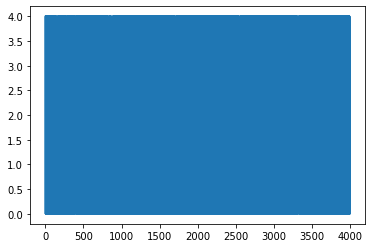

In [ ]:
import matplotlib.pyplot as plt
print(predicted)
for i in predicted:
    print(i, end ='  ')

# plt.subplot(2, 1, 1)
plt.plot(predicted)
plt.show()